<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-1" data-toc-modified-id="Dataset-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset 1</a></span><ul class="toc-item"><li><span><a href="#Explorando-os-Dados" data-toc-modified-id="Explorando-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explorando os Dados</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Avaliando-Resultado" data-toc-modified-id="Avaliando-Resultado-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Avaliando Resultado</a></span></li><li><span><a href="#Efeito-C" data-toc-modified-id="Efeito-C-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Efeito C</a></span></li></ul></li><li><span><a href="#Dataset-2" data-toc-modified-id="Dataset-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset 2</a></span><ul class="toc-item"><li><span><a href="#Explorando-os-Dados" data-toc-modified-id="Explorando-os-Dados-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Explorando os Dados</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Efeito-Gamma" data-toc-modified-id="Efeito-Gamma-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Efeito Gamma</a></span></li></ul></li><li><span><a href="#Dataset-3" data-toc-modified-id="Dataset-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset 3</a></span><ul class="toc-item"><li><span><a href="#Explorando-os-Dados" data-toc-modified-id="Explorando-os-Dados-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Explorando os Dados</a></span></li><li><span><a href="#Treinando-um-Modelo" data-toc-modified-id="Treinando-um-Modelo-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Treinando um Modelo</a></span></li></ul></li></ul></div>

O objetivo deste notebook é alocar toda a análise referente ao modelo de Support Vector Machines, sendo proposta, em um primeiro momento, a resolução de um problema de classificação envolvendo diferentes datasets e, logo em seguida, o desenvolvimento de um classificador de Spams.

## Dataset 1

O primeiro dataset é composto por dados em 2 dimensões linearmente separáveis por uma fronteira de decisão.

### Explorando os Dados

In [59]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import scipy.io as sio

In [60]:
# Lendo arquivo
data1 = sio.loadmat('ex6data1.mat')

In [61]:
# Verificando output
data1

{'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057  , 2.3853  ],
        [1.8721  , 2.0577  ],
        [2.0103  , 2.3546  ],
        [1.2269  , 2.3239  ],
        [1.8951  , 2.9174  ],
     

In [62]:
# Separando dados
X = data1['X']
y = data1['y']

# Contabilizando
print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de y: {y.shape}')

print(f'\nPrimeira linha de X: \n{X[0]}')

Dimensões de X: (51, 2)
Dimensões de y: (51, 1)

Primeira linha de X: 
[1.9643 4.5957]


In [63]:
# Transformando em dataframe
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y
df.head()

x1      x2  label
0  1.9643  4.5957      1
1  2.2753  3.8589      1
2  2.9781  4.5651      1
3  2.9320  3.5519      1
4  3.5772  2.8560      1

In [64]:
# Indexando classes
pos = df[df.iloc[:, 2] == 1]
neg = df[df.iloc[:, 2] == 0]

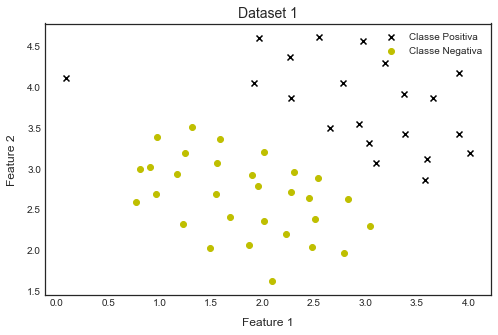

In [65]:
# Importando bibliotecas para plotagem
import matplotlib.pyplot as plt
%matplotlib inline

# Plotando dados
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(pos.iloc[:, 0], pos.iloc[:, 1], marker='x', c='k', label='Classe Positiva')
ax.scatter(neg.iloc[:, 0], neg.iloc[:, 1], marker='o', c='y', label='Classe Negativa')
ax.set_title('Dataset 1', size=14)
ax.set_xlabel('Feature 1', size=12, labelpad=10)
ax.set_ylabel('Feature 2', size=12, labelpad=10)
plt.legend(loc='upper right')
plt.show()

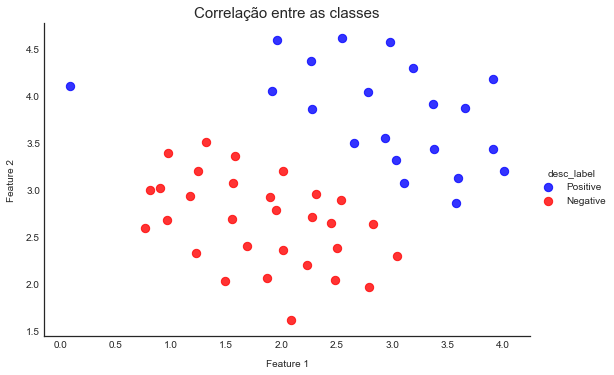

In [66]:
# Preparando plotagem via seaborn
import seaborn as sns

df['desc_label'] = df['label'].apply(lambda x: 'Positive' if x==1 else 'Negative')
sns.set_style('white')
sns.lmplot(x='x1', y='x2', data=df, hue='desc_label', 
           palette=dict(Positive='b', Negative='r'), fit_reg=False, 
           scatter_kws=dict(s=70), size=5, aspect=1.5)
plt.title('Correlação entre as classes', size=15)
plt.xlabel('Feature 1', labelpad=10)
plt.ylabel('Feature 2', labelpad=10)
plt.show()

Vemos, a partir da plotagem, que os dados realmente são linearmente separáveis. Entretanto, é possível notar um ```outlier``` da classe positiva na extremidade superior esquerda. Vamos estudar o modelo SVM alterando seu parâmetro C.

### Treinando Modelo

[sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [67]:
# Importando SVM
from sklearn.svm import SVC

In [68]:
# Treinando modelo
X = df.iloc[:, :2]
y = df.iloc[:, 2]

svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Interessante olhar para os hiperparâmetros...

Por enquanto, temos como padrão ``C=1``

### Avaliando Resultado

In [69]:
# Score nos dados de treino
from sklearn.metrics import accuracy_score

y_pred_train = svm_clf.predict(X)
acc_train = accuracy_score(y_pred_train, y)
print(f'Acurácia com os dados de treino: {acc_train:.2f}')

Acurácia com os dados de treino: 0.98


In [70]:
# Acurácia em validação cruzada
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X, y, cv=5)
print(f'Acurácia em validação cruzada: {svm_scores.mean():.2f}')

Acurácia em validação cruzada: 0.98


In [71]:
# Verificando parâmetros do modelo
svm_clf.coef_[0]

array([1.40718563, 2.13398052])

In [72]:
# Definindo função para plotagem da fronteira de decisão
def plotDecisionBoundary(df, coef, intercept):
    """docstring for plotDecisionBoundary:
    função responsável por plotar a curva obtida após o treinamento do modelo
    
    input:
        df: dataframe contendo os dados;
        coef: coeficientes do modelo obtido com o treinamento;
        intercept: intersecção do eixo obtido com o treinamento"""
    
    # Retornando features e label do dataframe
    X = df.iloc[:, :2]
    y = df.iloc[:, 2]
    
    # Indexando classes
    pos = df[df.iloc[:, 2] == 1]
    neg = df[df.iloc[:, 2] == 0]
    
    # Preparando plot com os coeficientes 
    w = coef[0]
    a = -w[0] / w[1]
    xx = np.linspace(X.iloc[:, 0].max()+1, X.iloc[:, 0].min())
    yy = a * xx - (intercept[0]) / w[1]
    
    # Plotando dados
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(pos.iloc[:, 0], pos.iloc[:, 1], marker='x', c='k', label='Classe Positiva')
    ax.scatter(neg.iloc[:, 0], neg.iloc[:, 1], marker='o', c='y', label='Classe Negativa')
    ax.plot(xx, yy, label='Curva Obtida', linewidth=2, color='black')
    ax.set_title('Dataset 1', size=14)
    ax.set_xlabel('Feature 1', size=13, labelpad=10)
    ax.set_ylabel('Feature 2', size=13, labelpad=10)
    plt.legend(loc='best')
    plt.show()

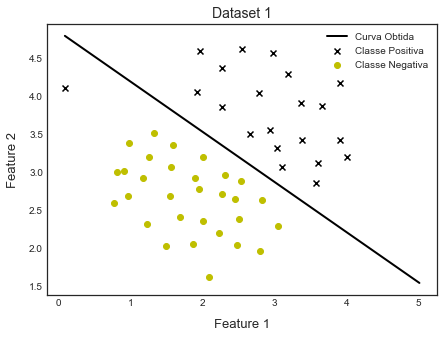

In [73]:
# Chamando função
plotDecisionBoundary(df, svm_clf.coef_, svm_clf.intercept_)

Agora temos condições de avaliar graficamente os efeitos do hiperparâmetro `C` no treinamento de um modelo de SVM.

Objetivo de otimização:
\begin{equation*}
    min_{\theta}C\sum_{i=1}^{m}\left[y^{(i)}cost_1\left(\theta^Tx^{(i)}\right)+
    \left(1-y^{(i)}\right)cost_0\left(\theta^Tx^{(i)}\right)\right]+
    \frac{1}{2}\sum_{j=1}^{n}\theta_j^2
\end{equation*}

### Efeito C

In [74]:
# Definindo função para reteornar fronteira de decisão
def calculateDecisionBoundary(X, svm_clf):
    """docstring for calculateDecisionBoundary:
    função responsável por calcular e retornar a fronteira de decisão relacionada
    Input:
        X: features do modelo:
        svm_clf: classificador já treinado
    Output:
        xx: mapeamento em x da fronteira de decisão
        yy: mapeamento em y da fronteira de decisão"""
    
    # Preparando plot com os coeficientes 
    w = svm_clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X.iloc[:, 0].max()+0.5, X.iloc[:, 0].min())
    yy = a * xx - (svm_clf.intercept_[0]) / w[1]
    
    """b = svm_clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = svm_clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])"""
    
    return xx, yy

In [75]:
def calculateSupportVectors(xlim, ylim, svm_clf):
    """docstring for calculateSupportVectors:
    função responsável por calcular e retornar as variáveis responsáveis pela plotagem
    dos vetores de suporte"""

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_clf.decision_function(xy).reshape(XX.shape)
    
    return XX, YY, Z

In [76]:
# Definindo função para comparar valores de C
def linearComparisonC(support_vectors=False):
    """docstring for linearComparisonC:
    função responsável por receber entradas do usuário de modo a plotar diferentes
    fronteiras de decisão para o hiperparâmetro C"""
    
    # Quantidade de comparações a serem realizadas
    qtd_comp = int(input('Quantos valores de C deseja comparar? (ideal: de 2 a 4): \n'))
    C_values = []

    # Armazenando valores de C
    for i in range(qtd_comp):
        C_values.append(float(input(f'Digite o {i+1}º valor de C: ')))

    # Criando figure e eixos
    fig, axs = plt.subplots(figsize=(13, 4), nrows=1, ncols=len(C_values))
    
    # Laço para plotagens
    for C in C_values:
        
        # Treinando modelo com cada valor de C
        svm_clf = SVC(C=C, kernel='linear')
        svm_clf.fit(X, y)            
              
        # Configurando plotagens
        idx = C_values.index(C)
        axs[idx].scatter(pos.iloc[:, 0], pos.iloc[:, 1], marker='x', c='b', label='Positive')
        axs[idx].scatter(neg.iloc[:, 0], neg.iloc[:, 1], marker='o', c='r', label='Negative')
        
        # Verificando condição da função
        if support_vectors:
            xlim = axs[idx].get_xlim()
            ylim = axs[idx].get_ylim()
            XX, YY, Z = calculateSupportVectors(xlim, ylim, svm_clf)
            # plot decision boundary and margins
            axs[idx].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                       linestyles=['--', '-', '--'])
            # plot support vectors
            axs[idx].scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100,
                       linewidth=1, facecolors='none', edgecolors='k')
        else:
            # Retornando fronteira de decisão para cada valor de C
            xx, yy = calculateDecisionBoundary(X, svm_clf)
            axs[idx].plot(xx, yy, label='Decision B', c='black', linewidth=2)
            
        # Detalhando plotagem
        fig.suptitle('SVM - Fronteiras de Decisão: Hiperparâmetro C', size=16)
        axs[idx].set_title(f'C = {C}', size=12)
        axs[idx].set_xlabel('Feature 1', size=8, labelpad=5)
        axs[idx].set_ylabel('Feature 2', size=8, labelpad=5)
        fig.tight_layout(rect=[0, 0.06, 1, 0.90])
        axs[idx].legend(loc='lower left')

Quantos valores de C deseja comparar? (ideal: de 2 a 4): 
3
Digite o 1º valor de C: 1
Digite o 2º valor de C: 10
Digite o 3º valor de C: 100


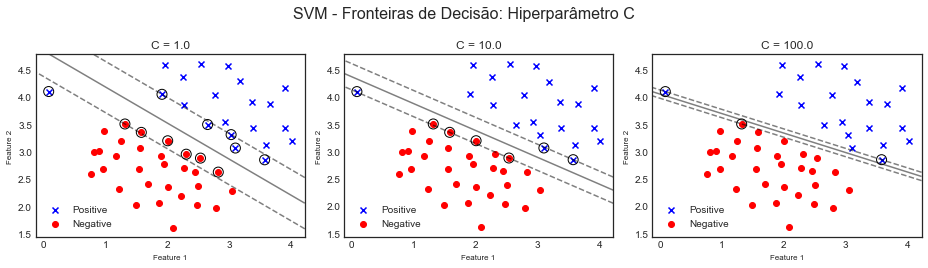

In [77]:
# Chamando função
linearComparisonC(support_vectors=True)

Neste primeiro dataset, foi avaliado um modelo onde os dados eram linearmente separáveis. O Kernel utilizado para o treinamento do SVM foi o ```linear```. Vamos agora analisar um segundo dataset, dessa vez com os dados não linearmente separáveis. Dica: será utilizado o kernel ```rbf```, equivalente ao ```Gaussian Kernel``` na classe SVC do sklearn.

## Dataset 2

### Explorando os Dados

In [20]:
# Lendo dados
data2 = sio.loadmat('ex6data2.mat')

# Verificando
data2

{'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [21]:
# Indexando
X = data2['X']
y = data2['y']

print(f'Dimensões de X: {X.shape}')

Dimensões de X: (863, 2)


Dessa vez temos uma quantidade maior de dados!

In [22]:
# Transformando em dataframe
df2 = pd.DataFrame(X, columns=['x1', 'x2'])
df2['label'] = y
df2.head()

x1        x2  label
0  0.107143  0.603070      1
1  0.093318  0.649854      1
2  0.097926  0.705409      1
3  0.155530  0.784357      1
4  0.210829  0.866228      1

In [23]:
# Indexando classes
pos = df2[df2.iloc[:, 2] == 1]
neg = df2[df2.iloc[:, 2] == 0]

In [24]:
# Preparando plotagem
def plotDataset2(df, contour=False):
    """docstring for plotDataset2:
    função responsável pela plotagem dos dados obtidos com o dataset 2D
    input:
        df: dataframe do pandas contendo os dados"""
    
    # Indexando classes
    pos = df[df.iloc[:, 2] == 1]
    neg = df[df.iloc[:, 2] == 0]
    
    # Preparando plotagem
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(pos.iloc[:, 0], pos.iloc[:, 1], label='Positive')
    ax.scatter(neg.iloc[:, 0], neg.iloc[:, 1], label='Negative')

    ax.set_title('Dataset 2', size=14)
    ax.set_xlabel('Feature 1', size=12, labelpad=8)
    ax.set_ylabel('Feature 2', size=12, labelpad=8)
    plt.legend()
    plt.show()

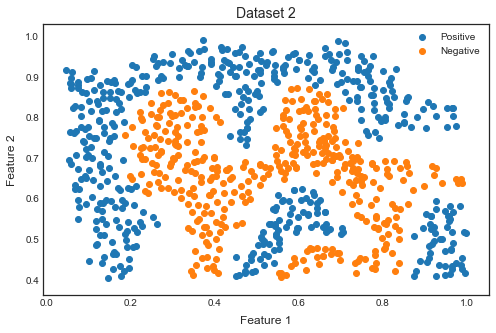

In [25]:
# Chamando função
plotDataset2(df2)

### Treinando Modelo

Vejamos o que acontece quando tentamos realizar o treinamento com um kernel ```linear```.

In [26]:
# Importando biblioteca
from sklearn.svm import SVC

# Treinando modelo
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

# Acurácia nos dados de treino
pred_train = svm_clf.predict(X)
acc_train = accuracy_score(y, pred_train)
print(f'Acurácia nos dados de treino: {acc_train:.2f}')

# Acurácia nos dados de validação
y_scores = cross_val_score(svm_clf, X, y)
print(f'Acurácia em validação cruzada: {y_scores.mean():.2f}')

Acurácia nos dados de treino: 0.57
Acurácia em validação cruzada: 0.50


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

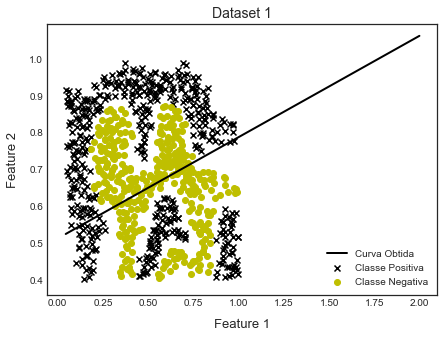

In [27]:
# Chamando função
plotDecisionBoundary(df2, svm_clf.coef_, svm_clf.intercept_)

Com certeza não é o que esperamos para o modelo.

In [28]:
# Vamos treinar o modelo com o kernel rbf
# Importando biblioteca
from sklearn.svm import SVC

# Treinando modelo
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X, y)

# Acurácia nos dados de treino
pred_train = svm_clf.predict(X)
acc_train = accuracy_score(y, pred_train)
print(f'Acurácia nos dados de treino: {acc_train:.2f}')

# Acurácia nos dados de validação
y_scores = cross_val_score(svm_clf, X, y)
print(f'Acurácia em validação cruzada: {y_scores.mean():.2f}')

Acurácia nos dados de treino: 0.76
Acurácia em validação cruzada: 0.55


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

A acurácia em validação cruzada continuou extremamente baixa!

In [29]:
# Definindo função para plotagem da curva do modelo
def getContour(X, svm_clf):
    """docstring for getContour:
    função responsável por calcular e retornar parâmetros necessários para a plotagem
    da fronteira de decisão de um treinamento SVM não linear
    """

    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 0]), 100)

    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros(X1.shape)

    for i in range(np.shape(X1)[1]):
        this_X = np.c_[X1[:, i], X2[:, i]]
        vals[:, i] = svm_clf.predict(this_X)
    
    return X1, X2, vals

In [30]:
# Preparando plotagem
def visualizeBoundary(df, X, svm_clf, contour=False):
    """docstring for visualizeBoundary:
    função responsável pela plotagem dos dados obtidos com o dataset 2D
    input:
        df: dataframe do pandas contendo os dados
        contour: flag para plotagem ou não da fronteira de decisão não linear"""
    
    # Indexando classes
    pos = df[df.iloc[:, 2] == 1]
    neg = df[df.iloc[:, 2] == 0]
    
    # Preparando plotagem
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(pos.iloc[:, 0], pos.iloc[:, 1], label='Positive')
    ax.scatter(neg.iloc[:, 0], neg.iloc[:, 1], label='Negative')
    if contour:
        X1, X2, vals = getContour(X, svm_clf)
        plt.contour(X1, X2, vals, colors='black')
    ax.set_title('Dataset 2', size=14)
    ax.set_xlabel('Feature 1', size=12, labelpad=8)
    ax.set_ylabel('Feature 2', size=12, labelpad=8)
    plt.legend()
    plt.show()

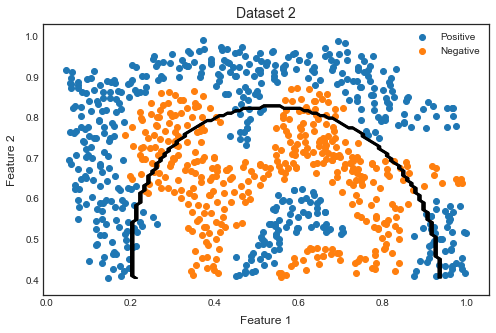

In [31]:
# Testando função
visualizeBoundary(df2, X, svm_clf, True)

O resultado melhorou com relação ao kernel linear, porém ainda não é a fronteira que esperamos. Será que se realizarmos um feature mapping, as coisas melhoram?

In [32]:
# Tentando feature mapping
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(9)
X_train = poly.fit_transform(X)

# Treinando modelo
svm_clf = SVC(kernel='rbf')
svm_clf.fit(X_train, y)

# Acurácia nos dados de treino
pred_train = svm_clf.predict(X_train)
acc_train = accuracy_score(y, pred_train)
print(f'Acurácia nos dados de treino: {acc_train:.2f}')

# Acurácia nos dados de validação
y_scores = cross_val_score(svm_clf, X_train, y)
print(f'Acurácia em validação cruzada: {y_scores.mean():.2f}')

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia nos dados de treino: 0.73
Acurácia em validação cruzada: 0.56


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Não!

In [33]:
# Testando outro kernel
svm_clf = SVC(kernel='poly')
svm_clf.fit(X, y)

# Acurácia nos dados de treino
pred_train = svm_clf.predict(X)
acc_train = accuracy_score(y, pred_train)
print(f'Acurácia nos dados de treino: {acc_train:.2f}')

# Acurácia nos dados de validação
y_scores = cross_val_score(svm_clf, X, y)
print(f'Acurácia em validação cruzada: {y_scores.mean():.2f}')

Acurácia nos dados de treino: 0.52
Acurácia em validação cruzada: 0.50


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Piorou.

In [34]:
# Visualizando detalhes do modelo
svm_clf = SVC(kernel='rbf', gamma=1)
svm_clf.fit(X, y)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# Mudando gamma
pred_train = svm_clf.predict(X)
acc_train = accuracy_score(y, pred_train)
print(f'Acurácia nos dados de treino: {acc_train:.2f}')

# Acurácia nos dados de validação
y_scores = cross_val_score(svm_clf, X, y)
print(f'Acurácia em validação cruzada: {y_scores.mean():.2f}')

Acurácia nos dados de treino: 0.81
Acurácia em validação cruzada: 0.65


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia melhorou. Vamos realizar uma busca completa!

In [36]:
# Visualizando detalhes do modelo
svm_clf = SVC(kernel='rbf', gamma=10)
svm_clf.fit(X, y)

# Mudando gamma
pred_train = svm_clf.predict(X)
acc_train = accuracy_score(y, pred_train)
print(f'Acurácia nos dados de treino: {acc_train:.2f}')

# Acurácia nos dados de validação
y_scores = cross_val_score(svm_clf, X, y)
print(f'Acurácia em validação cruzada: {y_scores.mean():.2f}')

Acurácia nos dados de treino: 0.88
Acurácia em validação cruzada: 0.74


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Aparentemente, quando aumentamos gamma, a acurácia do modelo aumenta!

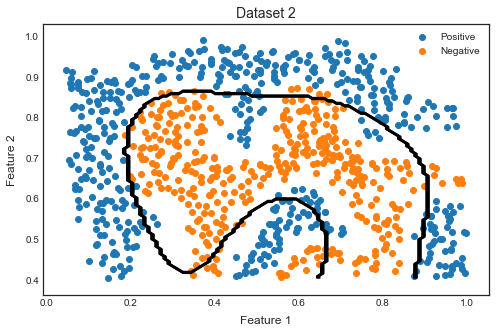

In [37]:
visualizeBoundary(df2, X, svm_clf, True)

### Grid Search

Vamos treinar o modelo com os melhores parâmetros

In [38]:
# Importando biblioteca
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros para SVM
param_grid_svm = [
    {
        'kernel': ['rbf'],
        'C': np.linspace(1, 50, 10),
        'gamma': np.linspace(1, 50, 10)
    }
]

# Criando classificador
svm_clf = SVC()

# Treinando e procurando melhor combinação
grid_search = GridSearchCV(svm_clf, param_grid_svm, cv=3, scoring='accuracy', verbose=4)
grid_search.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.6840277777777778, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.7673611111111112, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.49825783972125437, total=   0.0s
[CV] C=1.0, gamma=6.444444444444445, kernel=rbf ......................
[CV]  C=1.0, gamma=6.444444444444445, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=1.0, gamma=6.444444444444445, kernel=rbf ......................
[CV]  C=1.0, gamma=6.444444444444445, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=1.0, gamma=6.444444444444445, kernel=rbf ......................
[CV]  C=1.0, gamma=6.444444444444445, kernel=rbf, score=0.5017421602787456, total=   0.0s
[CV] C=1.0, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Do

[CV]  C=1.0, gamma=17.333333333333336, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=1.0, gamma=17.333333333333336, kernel=rbf .....................
[CV]  C=1.0, gamma=17.333333333333336, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=1.0, gamma=17.333333333333336, kernel=rbf .....................
[CV]  C=1.0, gamma=17.333333333333336, kernel=rbf, score=0.5818815331010453, total=   0.0s
[CV] C=1.0, gamma=22.77777777777778, kernel=rbf ......................
[CV]  C=1.0, gamma=22.77777777777778, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=1.0, gamma=22.77777777777778, kernel=rbf ......................
[CV]  C=1.0, gamma=22.77777777777778, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=1.0, gamma=22.77777777777778, kernel=rbf ......................
[CV]  C=1.0, gamma=22.77777777777778, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=1.0, gamma=28.22222222222222, kernel=rbf ......................
[CV]  C=1.0, gamma=28.222222222

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=44.55555555555556, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=1.0, gamma=44.55555555555556, kernel=rbf ......................
[CV]  C=1.0, gamma=44.55555555555556, kernel=rbf, score=0.8229166666666666, total=   0.0s
[CV] C=1.0, gamma=44.55555555555556, kernel=rbf ......................
[CV]  C=1.0, gamma=44.55555555555556, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=1.0, gamma=50.0, kernel=rbf ...................................
[CV]  C=1.0, gamma=50.0, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=1.0, gamma=50.0, kernel=rbf ...................................
[CV]  C=1.0, gamma=50.0, kernel=rbf, score=0.8298611111111112, total=   0.0s
[CV] C=1.0, gamma=50.0, kernel=rbf ...................................
[CV]  C=1.0, gamma=50.0, kernel=rbf, score=0.6411149825783972, total=   0.0s
[CV] C=6.444444444444445, gamma=1.0, kernel=rbf ......................
[CV]  C=6.444444444444445, gamma=1.0, kernel=rbf, score=0.892361111111111

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=6.444444444444445, gamma=11.88888888888889, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=6.444444444444445, gamma=11.88888888888889, kernel=rbf ........
[CV]  C=6.444444444444445, gamma=11.88888888888889, kernel=rbf, score=0.578397212543554, total=   0.0s
[CV] C=6.444444444444445, gamma=17.333333333333336, kernel=rbf .......
[CV]  C=6.444444444444445, gamma=17.333333333333336, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=6.444444444444445, gamma=17.333333333333336, kernel=rbf .......
[CV]  C=6.444444444444445, gamma=17.333333333333336, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=6.444444444444445, gamma=17.333333333333336, kernel=rbf .......
[CV]  C=6.444444444444445, gamma=17.333333333333336, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=6.444444444444445, gamma=22.77777777777778, kernel=rbf ........
[CV]  C=6.444444444444445, gamma=22.77777777777778, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=6.444444444444445, gamm

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=6.444444444444445, gamma=39.111111111111114, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=6.444444444444445, gamma=44.55555555555556, kernel=rbf ........
[CV]  C=6.444444444444445, gamma=44.55555555555556, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=6.444444444444445, gamma=44.55555555555556, kernel=rbf ........
[CV]  C=6.444444444444445, gamma=44.55555555555556, kernel=rbf, score=0.8402777777777778, total=   0.0s
[CV] C=6.444444444444445, gamma=44.55555555555556, kernel=rbf ........
[CV]  C=6.444444444444445, gamma=44.55555555555556, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=6.444444444444445, gamma=50.0, kernel=rbf .....................
[CV]  C=6.444444444444445, gamma=50.0, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=6.444444444444445, gamma=50.0, kernel=rbf .....................
[CV]  C=6.444444444444445, gamma=50.0, kernel=rbf, score=0.8715277777777778, total=   0.0s
[CV] C=6.444444444444445, gamma=50.0, kernel=r

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.88888888888889, gamma=11.88888888888889, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=11.88888888888889, gamma=11.88888888888889, kernel=rbf ........
[CV]  C=11.88888888888889, gamma=11.88888888888889, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=11.88888888888889, gamma=11.88888888888889, kernel=rbf ........
[CV]  C=11.88888888888889, gamma=11.88888888888889, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=11.88888888888889, gamma=17.333333333333336, kernel=rbf .......
[CV]  C=11.88888888888889, gamma=17.333333333333336, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=11.88888888888889, gamma=17.333333333333336, kernel=rbf .......
[CV]  C=11.88888888888889, gamma=17.333333333333336, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=11.88888888888889, gamma=17.333333333333336, kernel=rbf .......
[CV]  C=11.88888888888889, gamma=17.333333333333336, kernel=rbf, score=0.6236933797909407, total=   0.0s
[CV] C=11.88888888888889, gam

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.88888888888889, gamma=39.111111111111114, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=11.88888888888889, gamma=39.111111111111114, kernel=rbf .......
[CV]  C=11.88888888888889, gamma=39.111111111111114, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=11.88888888888889, gamma=44.55555555555556, kernel=rbf ........
[CV]  C=11.88888888888889, gamma=44.55555555555556, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=11.88888888888889, gamma=44.55555555555556, kernel=rbf ........
[CV]  C=11.88888888888889, gamma=44.55555555555556, kernel=rbf, score=0.8576388888888888, total=   0.0s
[CV] C=11.88888888888889, gamma=44.55555555555556, kernel=rbf ........
[CV]  C=11.88888888888889, gamma=44.55555555555556, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=11.88888888888889, gamma=50.0, kernel=rbf .....................
[CV]  C=11.88888888888889, gamma=50.0, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=11.88888888888889, gamma=

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333336, gamma=6.444444444444445, kernel=rbf, score=0.5470383275261324, total=   0.0s
[CV] C=17.333333333333336, gamma=11.88888888888889, kernel=rbf .......
[CV]  C=17.333333333333336, gamma=11.88888888888889, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=17.333333333333336, gamma=11.88888888888889, kernel=rbf .......
[CV]  C=17.333333333333336, gamma=11.88888888888889, kernel=rbf, score=0.7951388888888888, total=   0.0s
[CV] C=17.333333333333336, gamma=11.88888888888889, kernel=rbf .......
[CV]  C=17.333333333333336, gamma=11.88888888888889, kernel=rbf, score=0.6062717770034843, total=   0.0s
[CV] C=17.333333333333336, gamma=17.333333333333336, kernel=rbf ......
[CV]  C=17.333333333333336, gamma=17.333333333333336, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=17.333333333333336, gamma=17.333333333333336, kernel=rbf ......
[CV]  C=17.333333333333336, gamma=17.333333333333336, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=17.333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333336, gamma=44.55555555555556, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=17.333333333333336, gamma=44.55555555555556, kernel=rbf .......
[CV]  C=17.333333333333336, gamma=44.55555555555556, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=17.333333333333336, gamma=50.0, kernel=rbf ....................
[CV]  C=17.333333333333336, gamma=50.0, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=17.333333333333336, gamma=50.0, kernel=rbf ....................
[CV]  C=17.333333333333336, gamma=50.0, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=17.333333333333336, gamma=50.0, kernel=rbf ....................
[CV]  C=17.333333333333336, gamma=50.0, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=22.77777777777778, gamma=1.0, kernel=rbf ......................
[CV]  C=22.77777777777778, gamma=1.0, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=22.77777777777778, gamma=1.0, kernel=rbf .....................

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=22.77777777777778, gamma=17.333333333333336, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=22.77777777777778, gamma=17.333333333333336, kernel=rbf .......
[CV]  C=22.77777777777778, gamma=17.333333333333336, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=22.77777777777778, gamma=22.77777777777778, kernel=rbf ........
[CV]  C=22.77777777777778, gamma=22.77777777777778, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=22.77777777777778, gamma=22.77777777777778, kernel=rbf ........
[CV]  C=22.77777777777778, gamma=22.77777777777778, kernel=rbf, score=0.8090277777777778, total=   0.0s
[CV] C=22.77777777777778, gamma=22.77777777777778, kernel=rbf ........
[CV]  C=22.77777777777778, gamma=22.77777777777778, kernel=rbf, score=0.6062717770034843, total=   0.0s
[CV] C=22.77777777777778, gamma=28.22222222222222, kernel=rbf ........
[CV]  C=22.77777777777778, gamma=28.22222222222222, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=22.777777777

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=28.22222222222222, gamma=1.0, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=28.22222222222222, gamma=1.0, kernel=rbf ......................
[CV]  C=28.22222222222222, gamma=1.0, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=28.22222222222222, gamma=1.0, kernel=rbf ......................
[CV]  C=28.22222222222222, gamma=1.0, kernel=rbf, score=0.5156794425087108, total=   0.0s
[CV] C=28.22222222222222, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=6.444444444444445, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=28.22222222222222, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=6.444444444444445, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=28.22222222222222, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=6.444444444444445, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=28.22222222222222, gamma=11.88888888888889, kernel=rbf ........
[CV

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=28.22222222222222, gamma=22.77777777777778, kernel=rbf, score=0.8090277777777778, total=   0.0s
[CV] C=28.22222222222222, gamma=22.77777777777778, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=22.77777777777778, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=28.22222222222222, gamma=28.22222222222222, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=28.22222222222222, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=28.22222222222222, gamma=28.22222222222222, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=28.22222222222222, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=28.22222222222222, gamma=28.22222222222222, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=28.22222222222222, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=28.22222222222222, gamma=33.66666666666667, kernel=rbf ........
[CV]  C=28.22222222222222, gamma=33.66666666666667, kernel=rbf, score=0.96875, total=   0.0s
[CV] C=28.22222222222222, gamma=

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.66666666666667, gamma=6.444444444444445, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=33.66666666666667, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=33.66666666666667, gamma=6.444444444444445, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=33.66666666666667, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=33.66666666666667, gamma=6.444444444444445, kernel=rbf, score=0.5644599303135889, total=   0.0s
[CV] C=33.66666666666667, gamma=11.88888888888889, kernel=rbf ........
[CV]  C=33.66666666666667, gamma=11.88888888888889, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=33.66666666666667, gamma=11.88888888888889, kernel=rbf ........
[CV]  C=33.66666666666667, gamma=11.88888888888889, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=33.66666666666667, gamma=11.88888888888889, kernel=rbf ........
[CV]  C=33.66666666666667, gamma=11.88888888888889, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=33.66666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.66666666666667, gamma=44.55555555555556, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=33.66666666666667, gamma=44.55555555555556, kernel=rbf ........
[CV]  C=33.66666666666667, gamma=44.55555555555556, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=33.66666666666667, gamma=50.0, kernel=rbf .....................
[CV]  C=33.66666666666667, gamma=50.0, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=33.66666666666667, gamma=50.0, kernel=rbf .....................
[CV]  C=33.66666666666667, gamma=50.0, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=33.66666666666667, gamma=50.0, kernel=rbf .....................
[CV]  C=33.66666666666667, gamma=50.0, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=39.111111111111114, gamma=1.0, kernel=rbf .....................
[CV]  C=39.111111111111114, gamma=1.0, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=39.111111111111114, gamma=1.0, kernel=rbf .....................
[CV

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=39.111111111111114, gamma=17.333333333333336, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=39.111111111111114, gamma=22.77777777777778, kernel=rbf .......
[CV]  C=39.111111111111114, gamma=22.77777777777778, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=39.111111111111114, gamma=22.77777777777778, kernel=rbf .......
[CV]  C=39.111111111111114, gamma=22.77777777777778, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=39.111111111111114, gamma=22.77777777777778, kernel=rbf .......
[CV]  C=39.111111111111114, gamma=22.77777777777778, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=39.111111111111114, gamma=28.22222222222222, kernel=rbf .......
[CV]  C=39.111111111111114, gamma=28.22222222222222, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=39.111111111111114, gamma=28.22222222222222, kernel=rbf .......
[CV]  C=39.111111111111114, gamma=28.22222222222222, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=39.111

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=44.55555555555556, gamma=1.0, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=44.55555555555556, gamma=1.0, kernel=rbf ......................
[CV]  C=44.55555555555556, gamma=1.0, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=44.55555555555556, gamma=1.0, kernel=rbf ......................
[CV]  C=44.55555555555556, gamma=1.0, kernel=rbf, score=0.5087108013937283, total=   0.0s
[CV] C=44.55555555555556, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=44.55555555555556, gamma=6.444444444444445, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=44.55555555555556, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=44.55555555555556, gamma=6.444444444444445, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=44.55555555555556, gamma=6.444444444444445, kernel=rbf ........
[CV]  C=44.55555555555556, gamma=6.444444444444445, kernel=rbf, score=0.5749128919860628, total=   0.0s
[CV] C=44.55555555555556, gamma=11.88888888888889, kernel=rbf ........
[CV

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=44.55555555555556, gamma=33.66666666666667, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=44.55555555555556, gamma=33.66666666666667, kernel=rbf ........
[CV]  C=44.55555555555556, gamma=33.66666666666667, kernel=rbf, score=0.8819444444444444, total=   0.0s
[CV] C=44.55555555555556, gamma=33.66666666666667, kernel=rbf ........
[CV]  C=44.55555555555556, gamma=33.66666666666667, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=44.55555555555556, gamma=39.111111111111114, kernel=rbf .......
[CV]  C=44.55555555555556, gamma=39.111111111111114, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=44.55555555555556, gamma=39.111111111111114, kernel=rbf .......
[CV]  C=44.55555555555556, gamma=39.111111111111114, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=44.55555555555556, gamma=39.111111111111114, kernel=rbf .......
[CV]  C=44.55555555555556, gamma=39.111111111111114, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=44.55555555

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=6.444444444444445, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=50.0, gamma=6.444444444444445, kernel=rbf .....................
[CV]  C=50.0, gamma=6.444444444444445, kernel=rbf, score=0.5923344947735192, total=   0.0s
[CV] C=50.0, gamma=11.88888888888889, kernel=rbf .....................
[CV]  C=50.0, gamma=11.88888888888889, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=50.0, gamma=11.88888888888889, kernel=rbf .....................
[CV]  C=50.0, gamma=11.88888888888889, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=50.0, gamma=11.88888888888889, kernel=rbf .....................
[CV]  C=50.0, gamma=11.88888888888889, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=50.0, gamma=17.333333333333336, kernel=rbf ....................
[CV]  C=50.0, gamma=17.333333333333336, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=50.0, gamma=17.333333333333336, kernel=rbf ....................
[CV]  C=50.0, gamma=17.333333333333336

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': array([ 1.     ,  6.44444, 11.88889, 17.33333, 22.77778, 28.22222,
       33.66667, 39.11111, 44.55556, 50.     ]), 'gamma': array([ 1.     ,  6.44444, 11.88889, 17.33333, 22.77778, 28.22222,
       33.66667, 39.11111, 44.55556, 50.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=4)

In [39]:
# Visualizando melhor resultado
grid_search.best_score_

0.847045191193511

In [40]:
# Melhor combinação
grid_search.best_estimator_

SVC(C=11.88888888888889, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

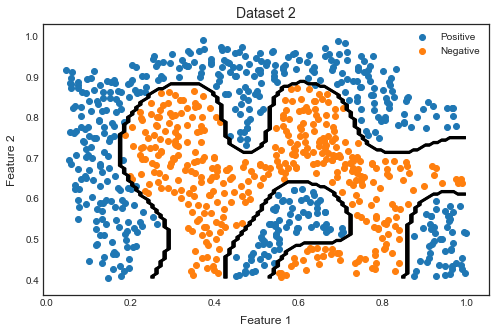

In [41]:
# Visualizando fronteira
model = grid_search.best_estimator_

visualizeBoundary(df2, X, model, True)

O modelo apresentou a melhor combinação de parâmetros para ```gama``` em seu valor máximo. Vamos aumentar ainda mais esse range!

In [42]:
# Importando biblioteca
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros para SVM
param_grid_svm = [
    {
        'kernel': ['rbf'],
        'C': np.linspace(1, 50, 25),
        'gamma': np.linspace(1, 100, 50)
    }
]

# Criando classificador
svm_clf = SVC()

# Treinando e procurando melhor combinação
grid_search = GridSearchCV(svm_clf, param_grid_svm, cv=3, scoring='accuracy', verbose=4)
grid_search.fit(X, y)

Fitting 3 folds for each of 1250 candidates, totalling 3750 fits
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.6840277777777778, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.7673611111111112, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.49825783972125437, total=   0.0s
[CV] C=1.0, gamma=3.020408163265306, kernel=rbf ......................
[CV]  C=1.0, gamma=3.020408163265306, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=1.0, gamma=3.020408163265306, kernel=rbf ......................
[CV]  C=1.0, gamma=3.020408163265306, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=1.0, gamma=3.020408163265306, kernel=rbf ......................
[CV]  C=1.0, gamma=3.020408163265306, kernel=rbf, score=0.5365853658536586, total=   0.0s
[CV] C=1.0

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Do

[CV]  C=1.0, gamma=7.061224489795918, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=1.0, gamma=7.061224489795918, kernel=rbf ......................
[CV]  C=1.0, gamma=7.061224489795918, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=1.0, gamma=7.061224489795918, kernel=rbf ......................
[CV]  C=1.0, gamma=7.061224489795918, kernel=rbf, score=0.49477351916376305, total=   0.0s
[CV] C=1.0, gamma=9.081632653061224, kernel=rbf ......................
[CV]  C=1.0, gamma=9.081632653061224, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=1.0, gamma=9.081632653061224, kernel=rbf ......................
[CV]  C=1.0, gamma=9.081632653061224, kernel=rbf, score=0.7708333333333334, total=   0.0s
[CV] C=1.0, gamma=9.081632653061224, kernel=rbf ......................
[CV]  C=1.0, gamma=9.081632653061224, kernel=rbf, score=0.5156794425087108, total=   0.0s
[CV] C=1.0, gamma=11.102040816326529, kernel=rbf .....................
[CV]  C=1.0, gamma=11.10204081632

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=19.183673469387752, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=1.0, gamma=19.183673469387752, kernel=rbf .....................
[CV]  C=1.0, gamma=19.183673469387752, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=1.0, gamma=19.183673469387752, kernel=rbf .....................
[CV]  C=1.0, gamma=19.183673469387752, kernel=rbf, score=0.5888501742160279, total=   0.0s
[CV] C=1.0, gamma=21.204081632653057, kernel=rbf .....................
[CV]  C=1.0, gamma=21.204081632653057, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=1.0, gamma=21.204081632653057, kernel=rbf .....................
[CV]  C=1.0, gamma=21.204081632653057, kernel=rbf, score=0.7951388888888888, total=   0.0s
[CV] C=1.0, gamma=21.204081632653057, kernel=rbf .....................
[CV]  C=1.0, gamma=21.204081632653057, kernel=rbf, score=0.5958188153310104, total=   0.0s
[CV] C=1.0, gamma=23.224489795918366, kernel=rbf .....................
[CV]  C=1.0, gamma=23.224489

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=29.285714285714285, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=1.0, gamma=29.285714285714285, kernel=rbf .....................
[CV]  C=1.0, gamma=29.285714285714285, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=1.0, gamma=29.285714285714285, kernel=rbf .....................
[CV]  C=1.0, gamma=29.285714285714285, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=1.0, gamma=31.30612244897959, kernel=rbf ......................
[CV]  C=1.0, gamma=31.30612244897959, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=1.0, gamma=31.30612244897959, kernel=rbf ......................
[CV]  C=1.0, gamma=31.30612244897959, kernel=rbf, score=0.7951388888888888, total=   0.0s
[CV] C=1.0, gamma=31.30612244897959, kernel=rbf ......................
[CV]  C=1.0, gamma=31.30612244897959, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=1.0, gamma=33.326530612244895, kernel=rbf .....................
[CV]  C=1.0, gamma=33.326530612

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=41.408163265306115, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=1.0, gamma=41.408163265306115, kernel=rbf .....................
[CV]  C=1.0, gamma=41.408163265306115, kernel=rbf, score=0.6306620209059234, total=   0.0s
[CV] C=1.0, gamma=43.42857142857142, kernel=rbf ......................
[CV]  C=1.0, gamma=43.42857142857142, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=1.0, gamma=43.42857142857142, kernel=rbf ......................
[CV]  C=1.0, gamma=43.42857142857142, kernel=rbf, score=0.8194444444444444, total=   0.0s
[CV] C=1.0, gamma=43.42857142857142, kernel=rbf ......................
[CV]  C=1.0, gamma=43.42857142857142, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=1.0, gamma=45.44897959183673, kernel=rbf ......................
[CV]  C=1.0, gamma=45.44897959183673, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=1.0, gamma=45.44897959183673, kernel=rbf ......................
[CV]  C=1.0, gamma=45.4489795918

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=55.55102040816326, kernel=rbf, score=0.9340277777777778, total=   0.0s
[CV] C=1.0, gamma=55.55102040816326, kernel=rbf ......................
[CV]  C=1.0, gamma=55.55102040816326, kernel=rbf, score=0.84375, total=   0.0s
[CV] C=1.0, gamma=55.55102040816326, kernel=rbf ......................
[CV]  C=1.0, gamma=55.55102040816326, kernel=rbf, score=0.627177700348432, total=   0.0s
[CV] C=1.0, gamma=57.57142857142857, kernel=rbf ......................
[CV]  C=1.0, gamma=57.57142857142857, kernel=rbf, score=0.9375, total=   0.0s
[CV] C=1.0, gamma=57.57142857142857, kernel=rbf ......................
[CV]  C=1.0, gamma=57.57142857142857, kernel=rbf, score=0.8576388888888888, total=   0.0s
[CV] C=1.0, gamma=57.57142857142857, kernel=rbf ......................
[CV]  C=1.0, gamma=57.57142857142857, kernel=rbf, score=0.6236933797909407, total=   0.0s
[CV] C=1.0, gamma=59.59183673469387, kernel=rbf ......................
[CV]  C=1.0, gamma=59.59183673469387, kernel=rbf, score=0.

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=67.67346938775509, kernel=rbf, score=0.8645833333333334, total=   0.0s
[CV] C=1.0, gamma=67.67346938775509, kernel=rbf ......................
[CV]  C=1.0, gamma=67.67346938775509, kernel=rbf, score=0.627177700348432, total=   0.0s
[CV] C=1.0, gamma=69.6938775510204, kernel=rbf .......................
[CV]  C=1.0, gamma=69.6938775510204, kernel=rbf, score=0.9409722222222222, total=   0.0s
[CV] C=1.0, gamma=69.6938775510204, kernel=rbf .......................
[CV]  C=1.0, gamma=69.6938775510204, kernel=rbf, score=0.8680555555555556, total=   0.0s
[CV] C=1.0, gamma=69.6938775510204, kernel=rbf .......................
[CV]  C=1.0, gamma=69.6938775510204, kernel=rbf, score=0.6236933797909407, total=   0.0s
[CV] C=1.0, gamma=71.71428571428571, kernel=rbf ......................
[CV]  C=1.0, gamma=71.71428571428571, kernel=rbf, score=0.9409722222222222, total=   0.0s
[CV] C=1.0, gamma=71.71428571428571, kernel=rbf ......................
[CV]  C=1.0, gamma=71.71428571428571, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=81.81632653061223, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=1.0, gamma=83.83673469387755, kernel=rbf ......................
[CV]  C=1.0, gamma=83.83673469387755, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=1.0, gamma=83.83673469387755, kernel=rbf ......................
[CV]  C=1.0, gamma=83.83673469387755, kernel=rbf, score=0.8715277777777778, total=   0.0s
[CV] C=1.0, gamma=83.83673469387755, kernel=rbf ......................
[CV]  C=1.0, gamma=83.83673469387755, kernel=rbf, score=0.6445993031358885, total=   0.0s
[CV] C=1.0, gamma=85.85714285714285, kernel=rbf ......................
[CV]  C=1.0, gamma=85.85714285714285, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=1.0, gamma=85.85714285714285, kernel=rbf ......................
[CV]  C=1.0, gamma=85.85714285714285, kernel=rbf, score=0.8715277777777778, total=   0.0s
[CV] C=1.0, gamma=85.85714285714285, kernel=rbf ......................
[CV]  C=1.0, gamma=85.857142857142

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=95.95918367346938, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=1.0, gamma=95.95918367346938, kernel=rbf ......................
[CV]  C=1.0, gamma=95.95918367346938, kernel=rbf, score=0.875, total=   0.0s
[CV] C=1.0, gamma=95.95918367346938, kernel=rbf ......................
[CV]  C=1.0, gamma=95.95918367346938, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=1.0, gamma=97.97959183673468, kernel=rbf ......................
[CV]  C=1.0, gamma=97.97959183673468, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=1.0, gamma=97.97959183673468, kernel=rbf ......................
[CV]  C=1.0, gamma=97.97959183673468, kernel=rbf, score=0.875, total=   0.0s
[CV] C=1.0, gamma=97.97959183673468, kernel=rbf ......................
[CV]  C=1.0, gamma=97.97959183673468, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=1.0, gamma=100.0, kernel=rbf ..................................
[CV]  C=1.0, gamma=100.0, kernel=rbf, score=0.95138888888888

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=3.020408163265306, kernel=rbf, score=0.49825783972125437, total=   0.0s
[CV] C=3.0416666666666665, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=5.040816326530612, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=3.0416666666666665, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=3.0416666666666665, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=5.040816326530612, kernel=rbf, score=0.4878048780487805, total=   0.0s
[CV] C=3.0416666666666665, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=7.061224489795918, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=3.0416666666666665, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=7.061224489795918, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=3.04166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=11.102040816326529, kernel=rbf, score=0.5644599303135889, total=   0.0s
[CV] C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf, score=0.578397212543554, total=   0.0s
[CV] C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf, score=0.7951388888888888, total=   0.0s
[CV] C=3.041666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=23.224489795918366, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=3.0416666666666665, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=23.224489795918366, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=3.0416666666666665, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=23.224489795918366, kernel=rbf, score=0.6167247386759582, total=   0.0s
[CV] C=3.0416666666666665, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=25.24489795918367, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=3.0416666666666665, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=25.24489795918367, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=3.0416666666666665, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=25.24489795918367, kernel=rbf, score=0.6167247386759582, total=   0.0s
[CV] C=3.041

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=37.367346938775505, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=3.0416666666666665, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=37.367346938775505, kernel=rbf, score=0.8229166666666666, total=   0.0s
[CV] C=3.0416666666666665, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=37.367346938775505, kernel=rbf, score=0.627177700348432, total=   0.0s
[CV] C=3.0416666666666665, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=39.38775510204081, kernel=rbf, score=0.9444444444444444, total=   0.0s
[CV] C=3.0416666666666665, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=39.38775510204081, kernel=rbf, score=0.8229166666666666, total=   0.0s
[CV] C=3.0416666666666665, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=39.38775510204081, kernel=rbf, score=0.6306620209059234, total=   0.0s
[CV] C=3.0416

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=51.51020408163265, kernel=rbf, score=0.8402777777777778, total=   0.0s
[CV] C=3.0416666666666665, gamma=51.51020408163265, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=51.51020408163265, kernel=rbf, score=0.627177700348432, total=   0.0s
[CV] C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf, score=0.84375, total=   0.0s
[CV] C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf, score=0.6306620209059234, total=   0.0s
[CV] C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=3.0416666666666665, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=65.65306122448979, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=3.0416666666666665, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=65.65306122448979, kernel=rbf, score=0.6445993031358885, total=   0.0s
[CV] C=3.0416666666666665, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=67.67346938775509, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=3.0416666666666665, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=67.67346938775509, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=3.0416666666666665, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=67.67346938775509, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=3.0416666666666665, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=3.0416666666666665, gamma=69.6938775510204, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=3.0416666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=81.81632653061223, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=3.0416666666666665, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=81.81632653061223, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=3.0416666666666665, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=81.81632653061223, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=3.0416666666666665, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=83.83673469387755, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=3.0416666666666665, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=83.83673469387755, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=3.0416666666666665, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=83.83673469387755, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=3.041666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=97.97959183673468, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=3.0416666666666665, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=97.97959183673468, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=3.0416666666666665, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=97.97959183673468, kernel=rbf, score=0.686411149825784, total=   0.0s
[CV] C=3.0416666666666665, gamma=100.0, kernel=rbf ...................
[CV]  C=3.0416666666666665, gamma=100.0, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=3.0416666666666665, gamma=100.0, kernel=rbf ...................
[CV]  C=3.0416666666666665, gamma=100.0, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=3.0416666666666665, gamma=100.0, kernel=rbf ...................
[CV]  C=3.0416666666666665, gamma=100.0, kernel=rbf, score=0.6898954703832753, total=   0.0s
[CV] C=5.083333333333333, gamma=1.0, kernel=rbf ....

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=5.040816326530612, kernel=rbf, score=0.49825783972125437, total=   0.0s
[CV] C=5.083333333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=7.061224489795918, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=5.083333333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=7.061224489795918, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=5.083333333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=7.061224489795918, kernel=rbf, score=0.5331010452961672, total=   0.0s
[CV] C=5.083333333333333, gamma=9.081632653061224, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=9.081632653061224, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=5.083333333333333, gamma=9.081632653061224, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=9.081632653061224, kernel=rbf, score=0.7708333333333334, total=   0.0s
[CV] C=5.08333333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=15.142857142857142, kernel=rbf, score=0.5958188153310104, total=   0.0s
[CV] C=5.083333333333333, gamma=17.163265306122447, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=17.163265306122447, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=5.083333333333333, gamma=17.163265306122447, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=17.163265306122447, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=5.083333333333333, gamma=17.163265306122447, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=17.163265306122447, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=5.083333333333333, gamma=19.183673469387752, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=19.183673469387752, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=5.083333333333333, gamma=19.183673469387752, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=19.183673469387752, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=5.083333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=41.408163265306115, kernel=rbf, score=0.9444444444444444, total=   0.0s
[CV] C=5.083333333333333, gamma=41.408163265306115, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=41.408163265306115, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=5.083333333333333, gamma=41.408163265306115, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=41.408163265306115, kernel=rbf, score=0.6341463414634146, total=   0.0s
[CV] C=5.083333333333333, gamma=43.42857142857142, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=43.42857142857142, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=5.083333333333333, gamma=43.42857142857142, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=43.42857142857142, kernel=rbf, score=0.8298611111111112, total=   0.0s
[CV] C=5.083333333333333, gamma=43.42857142857142, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=43.42857142857142, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=5.083333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=53.53061224489795, kernel=rbf, score=0.875, total=   0.0s
[CV] C=5.083333333333333, gamma=53.53061224489795, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=53.53061224489795, kernel=rbf, score=0.6445993031358885, total=   0.0s
[CV] C=5.083333333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=5.083333333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=55.55102040816326, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=5.083333333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=55.55102040816326, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=5.083333333333333, gamma=57.57142857142857, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=57.57142857142857, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=5.083333333333333, gamma=57

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=67.67346938775509, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=5.083333333333333, gamma=69.6938775510204, kernel=rbf .........
[CV]  C=5.083333333333333, gamma=69.6938775510204, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=5.083333333333333, gamma=69.6938775510204, kernel=rbf .........
[CV]  C=5.083333333333333, gamma=69.6938775510204, kernel=rbf, score=0.9340277777777778, total=   0.0s
[CV] C=5.083333333333333, gamma=69.6938775510204, kernel=rbf .........
[CV]  C=5.083333333333333, gamma=69.6938775510204, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=5.083333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=71.71428571428571, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=5.083333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=71.71428571428571, kernel=rbf, score=0.9340277777777778, total=   0.0s
[CV] C=5.083333333333333,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=85.85714285714285, kernel=rbf, score=0.9340277777777778, total=   0.0s
[CV] C=5.083333333333333, gamma=85.85714285714285, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=85.85714285714285, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=5.083333333333333, gamma=87.87755102040815, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=87.87755102040815, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=5.083333333333333, gamma=87.87755102040815, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=87.87755102040815, kernel=rbf, score=0.9340277777777778, total=   0.0s
[CV] C=5.083333333333333, gamma=87.87755102040815, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=87.87755102040815, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=5.083333333333333, gamma=89.89795918367346, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=89.89795918367346, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=5.083333333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=97.97959183673468, kernel=rbf, score=0.6968641114982579, total=   0.0s
[CV] C=5.083333333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=5.083333333333333, gamma=100.0, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=5.083333333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=5.083333333333333, gamma=100.0, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=5.083333333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=5.083333333333333, gamma=100.0, kernel=rbf, score=0.6968641114982579, total=   0.0s
[CV] C=7.125, gamma=1.0, kernel=rbf ..................................
[CV]  C=7.125, gamma=1.0, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=7.125, gamma=1.0, kernel=rbf ..................................
[CV] .... C=7.125, gamma=1.0, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=7.125, gamma=1.0, kernel=rbf ..................................
[CV]  C=7.125, gamma=1.0, kernel=rbf, score=0

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=7.125, gamma=5.040816326530612, kernel=rbf ....................
[CV]  C=7.125, gamma=5.040816326530612, kernel=rbf, score=0.5052264808362369, total=   0.0s
[CV] C=7.125, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=7.125, gamma=7.061224489795918, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=7.125, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=7.125, gamma=7.061224489795918, kernel=rbf, score=0.7673611111111112, total=   0.0s
[CV] C=7.125, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=7.125, gamma=7.061224489795918, kernel=rbf, score=0.5365853658536586, total=   0.0s
[CV] C=7.125, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=7.125, gamma=9.081632653061224, kernel=rbf, score=0.9027777777777778, total=   0.0s
[CV] C=7.125, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=7.125, gamma=9

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=13.122448979591836, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=7.125, gamma=15.142857142857142, kernel=rbf ...................
[CV]  C=7.125, gamma=15.142857142857142, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=7.125, gamma=15.142857142857142, kernel=rbf ...................
[CV]  C=7.125, gamma=15.142857142857142, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=7.125, gamma=15.142857142857142, kernel=rbf ...................
[CV]  C=7.125, gamma=15.142857142857142, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=7.125, gamma=17.163265306122447, kernel=rbf ...................
[CV]  C=7.125, gamma=17.163265306122447, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=7.125, gamma=17.163265306122447, kernel=rbf ...................
[CV]  C=7.125, gamma=17.163265306122447, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=7.125, gamma=17.163265306122447, kernel=rbf ...................
[CV]  C=7.125, g

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=21.204081632653057, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=7.125, gamma=21.204081632653057, kernel=rbf ...................
[CV]  C=7.125, gamma=21.204081632653057, kernel=rbf, score=0.6132404181184669, total=   0.0s
[CV] C=7.125, gamma=23.224489795918366, kernel=rbf ...................
[CV]  C=7.125, gamma=23.224489795918366, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=7.125, gamma=23.224489795918366, kernel=rbf ...................
[CV]  C=7.125, gamma=23.224489795918366, kernel=rbf, score=0.7986111111111112, total=   0.0s
[CV] C=7.125, gamma=23.224489795918366, kernel=rbf ...................
[CV]  C=7.125, gamma=23.224489795918366, kernel=rbf, score=0.6132404181184669, total=   0.0s
[CV] C=7.125, gamma=25.24489795918367, kernel=rbf ....................
[CV]  C=7.125, gamma=25.24489795918367, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=7.125, gamma=25.24489795918367, kernel=rbf ....................
[CV]  C=7.125, ga

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=31.30612244897959, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=7.125, gamma=31.30612244897959, kernel=rbf ....................
[CV]  C=7.125, gamma=31.30612244897959, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=7.125, gamma=31.30612244897959, kernel=rbf ....................
[CV]  C=7.125, gamma=31.30612244897959, kernel=rbf, score=0.6306620209059234, total=   0.0s
[CV] C=7.125, gamma=33.326530612244895, kernel=rbf ...................
[CV]  C=7.125, gamma=33.326530612244895, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=7.125, gamma=33.326530612244895, kernel=rbf ...................
[CV]  C=7.125, gamma=33.326530612244895, kernel=rbf, score=0.8194444444444444, total=   0.0s
[CV] C=7.125, gamma=33.326530612244895, kernel=rbf ...................
[CV]  C=7.125, gamma=33.326530612244895, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=7.125, gamma=35.3469387755102, kernel=rbf .....................
[CV]  C=7.125, gamm

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=41.408163265306115, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=7.125, gamma=43.42857142857142, kernel=rbf ....................
[CV]  C=7.125, gamma=43.42857142857142, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=7.125, gamma=43.42857142857142, kernel=rbf ....................
[CV]  C=7.125, gamma=43.42857142857142, kernel=rbf, score=0.8368055555555556, total=   0.0s
[CV] C=7.125, gamma=43.42857142857142, kernel=rbf ....................
[CV]  C=7.125, gamma=43.42857142857142, kernel=rbf, score=0.6411149825783972, total=   0.0s
[CV] C=7.125, gamma=45.44897959183673, kernel=rbf ....................
[CV]  C=7.125, gamma=45.44897959183673, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=7.125, gamma=45.44897959183673, kernel=rbf ....................
[CV]  C=7.125, gamma=45.44897959183673, kernel=rbf, score=0.84375, total=   0.0s
[CV] C=7.125, gamma=45.44897959183673, kernel=rbf ....................
[CV]  C=7.125, gamma=45.44897959

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=55.55102040816326, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=7.125, gamma=57.57142857142857, kernel=rbf ....................
[CV]  C=7.125, gamma=57.57142857142857, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=7.125, gamma=57.57142857142857, kernel=rbf ....................
[CV]  C=7.125, gamma=57.57142857142857, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=7.125, gamma=57.57142857142857, kernel=rbf ....................
[CV]  C=7.125, gamma=57.57142857142857, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=7.125, gamma=59.59183673469387, kernel=rbf ....................
[CV]  C=7.125, gamma=59.59183673469387, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=7.125, gamma=59.59183673469387, kernel=rbf ....................
[CV]  C=7.125, gamma=59.59183673469387, kernel=rbf, score=0.9027777777777778, total=   0.0s
[CV] C=7.125, gamma=59.59183673469387, kernel=rbf ....................
[CV]  C=7.125, gamma=59

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=73.73469387755101, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=7.125, gamma=73.73469387755101, kernel=rbf ....................
[CV]  C=7.125, gamma=73.73469387755101, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=7.125, gamma=75.75510204081633, kernel=rbf ....................
[CV]  C=7.125, gamma=75.75510204081633, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=7.125, gamma=75.75510204081633, kernel=rbf ....................
[CV]  C=7.125, gamma=75.75510204081633, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=7.125, gamma=75.75510204081633, kernel=rbf ....................
[CV]  C=7.125, gamma=75.75510204081633, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=7.125, gamma=77.77551020408163, kernel=rbf ....................
[CV]  C=7.125, gamma=77.77551020408163, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=7.125, gamma=77.77551020408163, kernel=rbf ....................
[CV]  C=7.125, gamma=77

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=89.89795918367346, kernel=rbf, score=0.9340277777777778, total=   0.0s
[CV] C=7.125, gamma=89.89795918367346, kernel=rbf ....................
[CV]  C=7.125, gamma=89.89795918367346, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=7.125, gamma=91.91836734693877, kernel=rbf ....................
[CV]  C=7.125, gamma=91.91836734693877, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=7.125, gamma=91.91836734693877, kernel=rbf ....................
[CV]  C=7.125, gamma=91.91836734693877, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=7.125, gamma=91.91836734693877, kernel=rbf ....................
[CV]  C=7.125, gamma=91.91836734693877, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=7.125, gamma=93.93877551020407, kernel=rbf ....................
[CV]  C=7.125, gamma=93.93877551020407, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=7.125, gamma=93.93877551020407, kernel=rbf ....................
[CV]  C=7.125, gamma=9

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=3.020408163265306, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=3.020408163265306, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=3.020408163265306, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=9.166666666666666, gamma=3.020408163265306, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=3.020408163265306, kernel=rbf, score=0.4843205574912892, total=   0.0s
[CV] C=9.166666666666666, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=5.040816326530612, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=9.166666666666666, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=5.040816326530612, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=9.166666666666666, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=5.040816326530612, kernel=rbf, score=0.5052264808362369, total=   0.0s
[CV] C=9.166666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=11.102040816326529, kernel=rbf, score=0.5923344947735192, total=   0.0s
[CV] C=9.166666666666666, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=13.122448979591836, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=9.166666666666666, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=13.122448979591836, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=9.166666666666666, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=13.122448979591836, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=9.166666666666666, gamma=15.142857142857142, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=15.142857142857142, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=9.166666666666666, gamma=15.142857142857142, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=15.142857142857142, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=9.166666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=25.24489795918367, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=25.24489795918367, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=25.24489795918367, kernel=rbf, score=0.7986111111111112, total=   0.0s
[CV] C=9.166666666666666, gamma=25.24489795918367, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=25.24489795918367, kernel=rbf, score=0.627177700348432, total=   0.0s
[CV] C=9.166666666666666, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=27.265306122448976, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=9.166666666666666, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=27.265306122448976, kernel=rbf, score=0.8055555555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=27.265306122448976, kernel=rbf, score=0.6306620209059234, total=   0.0s
[CV] C=9.1666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=9.166666666666666, gamma=37.367346938775505, kernel=rbf, score=0.6445993031358885, total=   0.0s
[CV] C=9.166666666666666, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=39.38775510204081, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=39.38775510204081, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=39.38775510204081, kernel=rbf, score=0.6445993031358885, total=   0.0s
[CV] C=9.166666666666666, gamma=41.408163265306115, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=41.408163265306115, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=41.408163265306115, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=41.408163265306115, kernel=rbf, score=0.8368055555555556, total=   0.0s
[CV] C=9.16666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=53.53061224489795, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=9.166666666666666, gamma=53.53061224489795, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=53.53061224489795, kernel=rbf, score=0.6759581881533101, total=   0.0s
[CV] C=9.166666666666666, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=55.55102040816326, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=9.166666666666666, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=55.55102040816326, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=55.55102040816326, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=9.166666666666666, gamma=57.57142857142857, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=57.57142857142857, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=9.166666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=69.6938775510204, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=9.166666666666666, gamma=69.6938775510204, kernel=rbf .........
[CV]  C=9.166666666666666, gamma=69.6938775510204, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=69.6938775510204, kernel=rbf .........
[CV]  C=9.166666666666666, gamma=69.6938775510204, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=9.166666666666666, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=71.71428571428571, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=9.166666666666666, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=71.71428571428571, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=71.71428571428571, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=9.166666666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=83.83673469387755, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=83.83673469387755, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=83.83673469387755, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=83.83673469387755, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=83.83673469387755, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=9.166666666666666, gamma=85.85714285714285, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=85.85714285714285, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=85.85714285714285, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=85.85714285714285, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=85.85714285714285, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=85.85714285714285, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=9.16666666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=97.97959183673468, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=97.97959183673468, kernel=rbf, score=0.686411149825784, total=   0.0s
[CV] C=9.166666666666666, gamma=100.0, kernel=rbf ....................
[CV]  C=9.166666666666666, gamma=100.0, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=9.166666666666666, gamma=100.0, kernel=rbf ....................
[CV]  C=9.166666666666666, gamma=100.0, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=9.166666666666666, gamma=100.0, kernel=rbf ....................
[CV]  C=9.166666666666666, gamma=100.0, kernel=rbf, score=0.6898954703832753, total=   0.0s
[CV] C=11.208333333333332, gamma=1.0, kernel=rbf .....................
[CV]  C=11.208333333333332, gamma=1.0, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=11.208333333333332, gamma=1.0, kernel=rbf .....................


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=5.040816326530612, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=11.208333333333332, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=5.040816326530612, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=11.208333333333332, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=7.061224489795918, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=11.208333333333332, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=7.061224489795918, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=11.208333333333332, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=7.061224489795918, kernel=rbf, score=0.5470383275261324, total=   0.0s
[CV] C=11.208333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=9.081632653061224, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=11.20833

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=17.163265306122447, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=11.208333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=17.163265306122447, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=11.208333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=19.183673469387752, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=11.208333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=19.183673469387752, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=11.208333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=19.183673469387752, kernel=rbf, score=0.6167247386759582, total=   0.0s
[CV] C=11.208333333333332, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=21.204081632653057, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=11.2083333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=31.30612244897959, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=11.208333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=33.326530612244895, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=11.208333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=33.326530612244895, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=11.208333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=33.326530612244895, kernel=rbf, score=0.6411149825783972, total=   0.0s
[CV] C=11.208333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=11.208333333333332, gamma=35.3469387755102, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=11.208333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=11.208333333333332, gamma=35.3469387755102, kernel=rbf, score=0.8229166666666666, total=   0.0s
[CV] C=11.2083

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=47.469387755102034, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=11.208333333333332, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=47.469387755102034, kernel=rbf, score=0.8715277777777778, total=   0.0s
[CV] C=11.208333333333332, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=47.469387755102034, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=11.208333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=49.48979591836734, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=11.208333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=49.48979591836734, kernel=rbf, score=0.8819444444444444, total=   0.0s
[CV] C=11.208333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=49.48979591836734, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=11.20

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=63.63265306122448, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=11.208333333333332, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=63.63265306122448, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=11.208333333333332, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=63.63265306122448, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=11.208333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=65.65306122448979, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=11.208333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=65.65306122448979, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=11.208333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=65.65306122448979, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=11.208333333333332,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=79.79591836734693, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=11.208333333333332, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=79.79591836734693, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=11.208333333333332, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=79.79591836734693, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=11.208333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=81.81632653061223, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=11.208333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=81.81632653061223, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=11.208333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=81.81632653061223, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=11.208333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=11.208333333333332, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=95.95918367346938, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=11.208333333333332, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=95.95918367346938, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=11.208333333333332, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=11.208333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=97.97959183673468, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=11.208333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=97.97959183673468, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=11.20833

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=5.040816326530612, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=13.25, gamma=5.040816326530612, kernel=rbf ....................
[CV]  C=13.25, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=13.25, gamma=5.040816326530612, kernel=rbf ....................
[CV]  C=13.25, gamma=5.040816326530612, kernel=rbf, score=0.5261324041811847, total=   0.0s
[CV] C=13.25, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=13.25, gamma=7.061224489795918, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=13.25, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=13.25, gamma=7.061224489795918, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=13.25, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=13.25, gamma=7.061224489795918, kernel=rbf, score=0.5470383275261324, total=   0.0s
[CV] C=13.25, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=13.25, gamma=9

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=17.163265306122447, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=13.25, gamma=17.163265306122447, kernel=rbf ...................
[CV]  C=13.25, gamma=17.163265306122447, kernel=rbf, score=0.6236933797909407, total=   0.0s
[CV] C=13.25, gamma=19.183673469387752, kernel=rbf ...................
[CV]  C=13.25, gamma=19.183673469387752, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=13.25, gamma=19.183673469387752, kernel=rbf ...................
[CV]  C=13.25, gamma=19.183673469387752, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=13.25, gamma=19.183673469387752, kernel=rbf ...................
[CV]  C=13.25, gamma=19.183673469387752, kernel=rbf, score=0.6167247386759582, total=   0.0s
[CV] C=13.25, gamma=21.204081632653057, kernel=rbf ...................
[CV]  C=13.25, gamma=21.204081632653057, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=13.25, gamma=21.204081632653057, kernel=rbf ...................
[CV]  C=13.25, gamma=21.204

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=31.30612244897959, kernel=rbf, score=0.6411149825783972, total=   0.0s
[CV] C=13.25, gamma=33.326530612244895, kernel=rbf ...................
[CV]  C=13.25, gamma=33.326530612244895, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=13.25, gamma=33.326530612244895, kernel=rbf ...................
[CV]  C=13.25, gamma=33.326530612244895, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=13.25, gamma=33.326530612244895, kernel=rbf ...................
[CV]  C=13.25, gamma=33.326530612244895, kernel=rbf, score=0.6445993031358885, total=   0.0s
[CV] C=13.25, gamma=35.3469387755102, kernel=rbf .....................
[CV]  C=13.25, gamma=35.3469387755102, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=13.25, gamma=35.3469387755102, kernel=rbf .....................
[CV]  C=13.25, gamma=35.3469387755102, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=13.25, gamma=35.3469387755102, kernel=rbf .....................
[CV]  C=13.25, gamma=

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=47.469387755102034, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=13.25, gamma=47.469387755102034, kernel=rbf ...................
[CV]  C=13.25, gamma=47.469387755102034, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=13.25, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=13.25, gamma=49.48979591836734, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=13.25, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=13.25, gamma=49.48979591836734, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=13.25, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=13.25, gamma=49.48979591836734, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=13.25, gamma=51.51020408163265, kernel=rbf ....................
[CV]  C=13.25, gamma=51.51020408163265, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=13.25, gamma=51.51020408163265, kernel=rbf ....................
[CV]  C=13.25, gamma

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=63.63265306122448, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=13.25, gamma=63.63265306122448, kernel=rbf ....................
[CV]  C=13.25, gamma=63.63265306122448, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=13.25, gamma=63.63265306122448, kernel=rbf ....................
[CV]  C=13.25, gamma=63.63265306122448, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=13.25, gamma=65.65306122448979, kernel=rbf ....................
[CV]  C=13.25, gamma=65.65306122448979, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=13.25, gamma=65.65306122448979, kernel=rbf ....................
[CV]  C=13.25, gamma=65.65306122448979, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=13.25, gamma=65.65306122448979, kernel=rbf ....................
[CV]  C=13.25, gamma=65.65306122448979, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=13.25, gamma=67.67346938775509, kernel=rbf ....................
[CV]  C=13.25, gamma=6

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=81.81632653061223, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=13.25, gamma=81.81632653061223, kernel=rbf ....................
[CV]  C=13.25, gamma=81.81632653061223, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=13.25, gamma=83.83673469387755, kernel=rbf ....................
[CV]  C=13.25, gamma=83.83673469387755, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=13.25, gamma=83.83673469387755, kernel=rbf ....................
[CV]  C=13.25, gamma=83.83673469387755, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=13.25, gamma=83.83673469387755, kernel=rbf ....................
[CV]  C=13.25, gamma=83.83673469387755, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=13.25, gamma=85.85714285714285, kernel=rbf ....................
[CV]  C=13.25, gamma=85.85714285714285, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=13.25, gamma=85.85714285714285, kernel=rbf ....................
[CV]  C=13.25, gamma=85.

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=100.0, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=13.25, gamma=100.0, kernel=rbf ................................
[CV]  C=13.25, gamma=100.0, kernel=rbf, score=0.6898954703832753, total=   0.0s
[CV] C=15.291666666666666, gamma=1.0, kernel=rbf .....................
[CV]  C=15.291666666666666, gamma=1.0, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=15.291666666666666, gamma=1.0, kernel=rbf .....................
[CV]  C=15.291666666666666, gamma=1.0, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=15.291666666666666, gamma=1.0, kernel=rbf .....................
[CV]  C=15.291666666666666, gamma=1.0, kernel=rbf, score=0.5156794425087108, total=   0.0s
[CV] C=15.291666666666666, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=3.020408163265306, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=15.291666666666666, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=3.02040816326

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=9.081632653061224, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=15.291666666666666, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=9.081632653061224, kernel=rbf, score=0.5853658536585366, total=   0.0s
[CV] C=15.291666666666666, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=11.102040816326529, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=15.291666666666666, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=11.102040816326529, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=15.291666666666666, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=11.102040816326529, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=15.291666666666666, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=13.122448979591836, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=15.2

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=25.24489795918367, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=15.291666666666666, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=25.24489795918367, kernel=rbf, score=0.8090277777777778, total=   0.0s
[CV] C=15.291666666666666, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=25.24489795918367, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=15.291666666666666, gamma=27.265306122448976, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=27.265306122448976, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=15.291666666666666, gamma=27.265306122448976, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=27.265306122448976, kernel=rbf, score=0.8125, total=   0.0s
[CV] C=15.291666666666666, gamma=27.265306122448976, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=27.265306122448976, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=15.29166666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=43.42857142857142, kernel=rbf, score=0.8715277777777778, total=   0.0s
[CV] C=15.291666666666666, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=43.42857142857142, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=15.291666666666666, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=45.44897959183673, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=15.291666666666666, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=45.44897959183673, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=15.291666666666666, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=45.44897959183673, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=15.291666666666666, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=47.469387755102034, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=15.2916

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=63.63265306122448, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=15.291666666666666, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=63.63265306122448, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=15.291666666666666, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=63.63265306122448, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=15.291666666666666, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=65.65306122448979, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=15.291666666666666, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=65.65306122448979, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=15.291666666666666, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=65.65306122448979, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=15.29166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=15.291666666666666, gamma=81.81632653061223, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=15.291666666666666, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=83.83673469387755, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=15.291666666666666, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=83.83673469387755, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=15.291666666666666, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=83.83673469387755, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=15.291666666666666, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=85.85714285714285, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=15.291666666666666, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=85.85714285714285, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=15.291666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=100.0, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=15.291666666666666, gamma=100.0, kernel=rbf ...................
[CV]  C=15.291666666666666, gamma=100.0, kernel=rbf, score=0.6898954703832753, total=   0.0s
[CV] C=17.333333333333332, gamma=1.0, kernel=rbf .....................
[CV]  C=17.333333333333332, gamma=1.0, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=17.333333333333332, gamma=1.0, kernel=rbf .....................
[CV]  C=17.333333333333332, gamma=1.0, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=17.333333333333332, gamma=1.0, kernel=rbf .....................
[CV]  C=17.333333333333332, gamma=1.0, kernel=rbf, score=0.5017421602787456, total=   0.0s
[CV] C=17.333333333333332, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=3.020408163265306, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=17.333333333333332, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=17

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=7.061224489795918, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=17.333333333333332, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=7.061224489795918, kernel=rbf, score=0.5644599303135889, total=   0.0s
[CV] C=17.333333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=9.081632653061224, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=17.333333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=9.081632653061224, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=17.333333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=9.081632653061224, kernel=rbf, score=0.5958188153310104, total=   0.0s
[CV] C=17.333333333333332, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=11.102040816326529, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=17.3333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=17.163265306122447, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=17.333333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=17.163265306122447, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=17.333333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=17.163265306122447, kernel=rbf, score=0.6167247386759582, total=   0.0s
[CV] C=17.333333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=19.183673469387752, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=17.333333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=19.183673469387752, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=17.333333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=19.183673469387752, kernel=rbf, score=0.6062717770034843, total=   0.0s
[CV] C=17

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=17.333333333333332, gamma=31.30612244897959, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=17.333333333333332, gamma=31.30612244897959, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=31.30612244897959, kernel=rbf, score=0.8298611111111112, total=   0.0s
[CV] C=17.333333333333332, gamma=31.30612244897959, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=31.30612244897959, kernel=rbf, score=0.6411149825783972, total=   0.0s
[CV] C=17.333333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=33.326530612244895, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=17.333333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=33.326530612244895, kernel=rbf, score=0.8298611111111112, total=   0.0s
[CV] C=17.333333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=33.326530612244895, kernel=rbf, score=0.6445993031358885, total=   0.0s
[CV] C=17.3

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=47.469387755102034, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=17.333333333333332, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=47.469387755102034, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=17.333333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=49.48979591836734, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=17.333333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=49.48979591836734, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=17.333333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=49.48979591836734, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=17.333333333333332, gamma=51.51020408163265, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=51.51020408163265, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=17.333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=65.65306122448979, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=17.333333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=65.65306122448979, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=17.333333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=65.65306122448979, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=17.333333333333332, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=67.67346938775509, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=17.333333333333332, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=67.67346938775509, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=17.333333333333332, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=67.67346938775509, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=17.33333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=81.81632653061223, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=17.333333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=81.81632653061223, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=17.333333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=81.81632653061223, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=17.333333333333332, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=83.83673469387755, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=17.333333333333332, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=83.83673469387755, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=17.333333333333332, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=83.83673469387755, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=17.3333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=17.333333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=97.97959183673468, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=17.333333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=97.97959183673468, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=17.333333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=97.97959183673468, kernel=rbf, score=0.686411149825784, total=   0.0s
[CV] C=17.333333333333332, gamma=100.0, kernel=rbf ...................
[CV]  C=17.333333333333332, gamma=100.0, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=17.333333333333332, gamma=100.0, kernel=rbf ...................
[CV]  C=17.333333333333332, gamma=100.0, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=17.333333333333332, gamma=100.0, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=5.040816326530612, kernel=rbf, score=0.5296167247386759, total=   0.0s
[CV] C=19.375, gamma=7.061224489795918, kernel=rbf ...................
[CV]  C=19.375, gamma=7.061224489795918, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=19.375, gamma=7.061224489795918, kernel=rbf ...................
[CV]  C=19.375, gamma=7.061224489795918, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=19.375, gamma=7.061224489795918, kernel=rbf ...................
[CV]  C=19.375, gamma=7.061224489795918, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=19.375, gamma=9.081632653061224, kernel=rbf ...................
[CV]  C=19.375, gamma=9.081632653061224, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=19.375, gamma=9.081632653061224, kernel=rbf ...................
[CV]  C=19.375, gamma=9.081632653061224, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=19.375, gamma=9.081632653061224, kernel=rbf ...................
[CV]  C=19.375, gamma=9.081

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=17.163265306122447, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=19.375, gamma=19.183673469387752, kernel=rbf ..................
[CV]  C=19.375, gamma=19.183673469387752, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=19.375, gamma=19.183673469387752, kernel=rbf ..................
[CV]  C=19.375, gamma=19.183673469387752, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=19.375, gamma=19.183673469387752, kernel=rbf ..................
[CV]  C=19.375, gamma=19.183673469387752, kernel=rbf, score=0.6062717770034843, total=   0.0s
[CV] C=19.375, gamma=21.204081632653057, kernel=rbf ..................
[CV]  C=19.375, gamma=21.204081632653057, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=19.375, gamma=21.204081632653057, kernel=rbf ..................
[CV]  C=19.375, gamma=21.204081632653057, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=19.375, gamma=21.204081632653057, kernel=rbf ..................
[CV]  C=19

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=31.30612244897959, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=19.375, gamma=31.30612244897959, kernel=rbf ...................
[CV]  C=19.375, gamma=31.30612244897959, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=19.375, gamma=33.326530612244895, kernel=rbf ..................
[CV]  C=19.375, gamma=33.326530612244895, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=19.375, gamma=33.326530612244895, kernel=rbf ..................
[CV]  C=19.375, gamma=33.326530612244895, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=19.375, gamma=33.326530612244895, kernel=rbf ..................
[CV]  C=19.375, gamma=33.326530612244895, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=19.375, gamma=35.3469387755102, kernel=rbf ....................
[CV]  C=19.375, gamma=35.3469387755102, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=19.375, gamma=35.3469387755102, kernel=rbf ....................
[CV]  C=19.375

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=47.469387755102034, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=19.375, gamma=49.48979591836734, kernel=rbf ...................
[CV]  C=19.375, gamma=49.48979591836734, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=19.375, gamma=49.48979591836734, kernel=rbf ...................
[CV]  C=19.375, gamma=49.48979591836734, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=19.375, gamma=49.48979591836734, kernel=rbf ...................
[CV]  C=19.375, gamma=49.48979591836734, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=19.375, gamma=51.51020408163265, kernel=rbf ...................
[CV]  C=19.375, gamma=51.51020408163265, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=19.375, gamma=51.51020408163265, kernel=rbf ...................
[CV]  C=19.375, gamma=51.51020408163265, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=19.375, gamma=51.51020408163265, kernel=rbf ...................
[CV]  C=19.375,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=65.65306122448979, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=19.375, gamma=65.65306122448979, kernel=rbf ...................
[CV]  C=19.375, gamma=65.65306122448979, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=19.375, gamma=65.65306122448979, kernel=rbf ...................
[CV]  C=19.375, gamma=65.65306122448979, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=19.375, gamma=67.67346938775509, kernel=rbf ...................
[CV]  C=19.375, gamma=67.67346938775509, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=19.375, gamma=67.67346938775509, kernel=rbf ...................
[CV]  C=19.375, gamma=67.67346938775509, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=19.375, gamma=67.67346938775509, kernel=rbf ...................
[CV]  C=19.375, gamma=67.67346938775509, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=19.375, gamma=69.6938775510204, kernel=rbf ....................
[CV]  C=19.375, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=83.83673469387755, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=19.375, gamma=83.83673469387755, kernel=rbf ...................
[CV]  C=19.375, gamma=83.83673469387755, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=19.375, gamma=83.83673469387755, kernel=rbf ...................
[CV]  C=19.375, gamma=83.83673469387755, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=19.375, gamma=85.85714285714285, kernel=rbf ...................
[CV]  C=19.375, gamma=85.85714285714285, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=19.375, gamma=85.85714285714285, kernel=rbf ...................
[CV]  C=19.375, gamma=85.85714285714285, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=19.375, gamma=85.85714285714285, kernel=rbf ...................
[CV]  C=19.375, gamma=85.85714285714285, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=19.375, gamma=87.87755102040815, kernel=rbf ...................
[CV]  C=19.375, ga

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=100.0, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=19.375, gamma=100.0, kernel=rbf ...............................
[CV]  C=19.375, gamma=100.0, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=19.375, gamma=100.0, kernel=rbf ...............................
[CV]  C=19.375, gamma=100.0, kernel=rbf, score=0.6898954703832753, total=   0.0s
[CV] C=21.416666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=21.416666666666664, gamma=1.0, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=21.416666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=21.416666666666664, gamma=1.0, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=21.416666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=21.416666666666664, gamma=1.0, kernel=rbf, score=0.5052264808362369, total=   0.0s
[CV] C=21.416666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=3.020408163265306, kernel=rbf, scor

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=9.081632653061224, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=21.416666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=9.081632653061224, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=21.416666666666664, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=11.102040816326529, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=21.416666666666664, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=11.102040816326529, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=21.416666666666664, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=11.102040816326529, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=21.416666666666664, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=13.122448979591836, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=21.4

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=21.204081632653057, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=21.416666666666664, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=21.204081632653057, kernel=rbf, score=0.6062717770034843, total=   0.0s
[CV] C=21.416666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=23.224489795918366, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=21.416666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=23.224489795918366, kernel=rbf, score=0.8090277777777778, total=   0.0s
[CV] C=21.416666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=23.224489795918366, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=21.416666666666664, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=25.24489795918367, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=21.

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8472222222222222, total=   0.0s
[CV] C=21.416666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=21.416666666666664, gamma=35.3469387755102, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=21.416666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=37.367346938775505, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=21.416666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8611111111111112, total=   0.0s
[CV] C=21.416666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=37.367346938775505, kernel=rbf, score=0.6724738675958188, total=   0.0s
[CV] C=21.416666666666664, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=39.38775510204081, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=21.41666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=45.44897959183673, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=21.416666666666664, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=47.469387755102034, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=21.416666666666664, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=47.469387755102034, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=21.416666666666664, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=47.469387755102034, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=21.416666666666664, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=49.48979591836734, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=21.416666666666664, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=49.48979591836734, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=21.416

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=53.53061224489795, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=21.416666666666664, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=53.53061224489795, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=53.53061224489795, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=21.416666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=55.55102040816326, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=55.55102040816326, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=55.55102040816326, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=21.416666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=69.6938775510204, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=21.416666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=71.71428571428571, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=21.416666666666664, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=73.73469387755101, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=73.73469387755101, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=21.416666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=83.83673469387755, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=21.416666666666664, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=85.85714285714285, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=85.85714285714285, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=85.85714285714285, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=21.416666666666664, gamma=87.87755102040815, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=87.87755102040815, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=21.416666666666664, gamma=87.87755102040815, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=87.87755102040815, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=21.4166666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=100.0, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=21.416666666666664, gamma=100.0, kernel=rbf ...................
[CV]  C=21.416666666666664, gamma=100.0, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=21.416666666666664, gamma=100.0, kernel=rbf ...................
[CV]  C=21.416666666666664, gamma=100.0, kernel=rbf, score=0.6898954703832753, total=   0.0s
[CV] C=23.458333333333332, gamma=1.0, kernel=rbf .....................
[CV]  C=23.458333333333332, gamma=1.0, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=23.458333333333332, gamma=1.0, kernel=rbf .....................
[CV]  C=23.458333333333332, gamma=1.0, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=23.458333333333332, gamma=1.0, kernel=rbf .....................
[CV]  C=23.458333333333332, gamma=1.0, kernel=rbf, score=0.49825783972125437, total=   0.0s
[CV] C=23.458333333333332, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=23.458333333333332, gamm

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=7.061224489795918, kernel=rbf, score=0.5644599303135889, total=   0.0s
[CV] C=23.458333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=9.081632653061224, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=23.458333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=9.081632653061224, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=23.458333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=9.081632653061224, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=23.458333333333332, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=11.102040816326529, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=23.458333333333332, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=11.102040816326529, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=23.458

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=19.183673469387752, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=23.458333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=19.183673469387752, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=23.458333333333332, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=21.204081632653057, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=23.458333333333332, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=21.204081632653057, kernel=rbf, score=0.7986111111111112, total=   0.0s
[CV] C=23.458333333333332, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=21.204081632653057, kernel=rbf, score=0.6062717770034843, total=   0.0s
[CV] C=23.458333333333332, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=23.224489795918366, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=23

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=23.458333333333332, gamma=33.326530612244895, kernel=rbf, score=0.8333333333333334, total=   0.0s
[CV] C=23.458333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=33.326530612244895, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=23.458333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=23.458333333333332, gamma=35.3469387755102, kernel=rbf, score=0.96875, total=   0.0s
[CV] C=23.458333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=23.458333333333332, gamma=35.3469387755102, kernel=rbf, score=0.8472222222222222, total=   0.0s
[CV] C=23.458333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=23.458333333333332, gamma=35.3469387755102, kernel=rbf, score=0.6724738675958188, total=   0.0s
[CV] C=23.458333333333332, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=37.367346938775505, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=23.458333333333332,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=47.469387755102034, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=23.458333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=49.48979591836734, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=23.458333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=49.48979591836734, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=23.458333333333332, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=49.48979591836734, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=23.458333333333332, gamma=51.51020408163265, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=51.51020408163265, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=23.458333333333332, gamma=51.51020408163265, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=51.51020408163265, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=23.45833

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=63.63265306122448, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=23.458333333333332, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=63.63265306122448, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=23.458333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=65.65306122448979, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=23.458333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=65.65306122448979, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=23.458333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=65.65306122448979, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=23.458333333333332, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=67.67346938775509, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=23.45833

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=79.79591836734693, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=23.458333333333332, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=79.79591836734693, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=23.458333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=81.81632653061223, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=23.458333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=81.81632653061223, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=23.458333333333332, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=81.81632653061223, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=23.458333333333332, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=83.83673469387755, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=23.458333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=23.458333333333332, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=95.95918367346938, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=23.458333333333332, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=95.95918367346938, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=23.458333333333332, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=23.458333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=97.97959183673468, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=23.458333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=97.97959183673468, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=23.45833

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=3.020408163265306, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=25.5, gamma=3.020408163265306, kernel=rbf .....................
[CV]  C=25.5, gamma=3.020408163265306, kernel=rbf, score=0.49477351916376305, total=   0.0s
[CV] C=25.5, gamma=5.040816326530612, kernel=rbf .....................
[CV]  C=25.5, gamma=5.040816326530612, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=25.5, gamma=5.040816326530612, kernel=rbf .....................
[CV]  C=25.5, gamma=5.040816326530612, kernel=rbf, score=0.7708333333333334, total=   0.0s
[CV] C=25.5, gamma=5.040816326530612, kernel=rbf .....................
[CV]  C=25.5, gamma=5.040816326530612, kernel=rbf, score=0.5400696864111498, total=   0.0s
[CV] C=25.5, gamma=7.061224489795918, kernel=rbf .....................
[CV]  C=25.5, gamma=7.061224489795918, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=25.5, gamma=7.061224489795918, kernel=rbf .....................
[CV]  C=25.5, gamma=7.06122

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=11.102040816326529, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=25.5, gamma=13.122448979591836, kernel=rbf ....................
[CV]  C=25.5, gamma=13.122448979591836, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=25.5, gamma=13.122448979591836, kernel=rbf ....................
[CV]  C=25.5, gamma=13.122448979591836, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=25.5, gamma=13.122448979591836, kernel=rbf ....................
[CV]  C=25.5, gamma=13.122448979591836, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=25.5, gamma=15.142857142857142, kernel=rbf ....................
[CV]  C=25.5, gamma=15.142857142857142, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=25.5, gamma=15.142857142857142, kernel=rbf ....................
[CV]  C=25.5, gamma=15.142857142857142, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=25.5, gamma=15.142857142857142, kernel=rbf ....................
[CV]  C=25.5, gamma=15.1428571428

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=23.224489795918366, kernel=rbf, score=0.8090277777777778, total=   0.0s
[CV] C=25.5, gamma=23.224489795918366, kernel=rbf ....................
[CV]  C=25.5, gamma=23.224489795918366, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=25.5, gamma=25.24489795918367, kernel=rbf .....................
[CV]  C=25.5, gamma=25.24489795918367, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=25.5, gamma=25.24489795918367, kernel=rbf .....................
[CV]  C=25.5, gamma=25.24489795918367, kernel=rbf, score=0.8194444444444444, total=   0.0s
[CV] C=25.5, gamma=25.24489795918367, kernel=rbf .....................
[CV]  C=25.5, gamma=25.24489795918367, kernel=rbf, score=0.6306620209059234, total=   0.0s
[CV] C=25.5, gamma=27.265306122448976, kernel=rbf ....................
[CV]  C=25.5, gamma=27.265306122448976, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=25.5, gamma=27.265306122448976, kernel=rbf ....................
[CV]  C=25.5, gamma=27.26

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=37.367346938775505, kernel=rbf, score=0.8680555555555556, total=   0.0s
[CV] C=25.5, gamma=37.367346938775505, kernel=rbf ....................
[CV]  C=25.5, gamma=37.367346938775505, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=25.5, gamma=39.38775510204081, kernel=rbf .....................
[CV]  C=25.5, gamma=39.38775510204081, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=25.5, gamma=39.38775510204081, kernel=rbf .....................
[CV]  C=25.5, gamma=39.38775510204081, kernel=rbf, score=0.8819444444444444, total=   0.0s
[CV] C=25.5, gamma=39.38775510204081, kernel=rbf .....................
[CV]  C=25.5, gamma=39.38775510204081, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=25.5, gamma=41.408163265306115, kernel=rbf ....................
[CV]  C=25.5, gamma=41.408163265306115, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=25.5, gamma=41.408163265306115, kernel=rbf ....................
[CV]  C=25.5, gamma=41.4081

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=55.55102040816326, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=25.5, gamma=57.57142857142857, kernel=rbf .....................
[CV]  C=25.5, gamma=57.57142857142857, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=25.5, gamma=57.57142857142857, kernel=rbf .....................
[CV]  C=25.5, gamma=57.57142857142857, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=25.5, gamma=57.57142857142857, kernel=rbf .....................
[CV]  C=25.5, gamma=57.57142857142857, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=25.5, gamma=59.59183673469387, kernel=rbf .....................
[CV]  C=25.5, gamma=59.59183673469387, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=25.5, gamma=59.59183673469387, kernel=rbf .....................
[CV]  C=25.5, gamma=59.59183673469387, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=25.5, gamma=59.59183673469387, kernel=rbf .....................
[CV]  C=25.5, gamma=59.59183

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=25.5, gamma=95.95918367346938, kernel=rbf .....................
[CV]  C=25.5, gamma=95.95918367346938, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=25.5, gamma=95.95918367346938, kernel=rbf .....................
[CV]  C=25.5, gamma=95.95918367346938, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=25.5, gamma=95.95918367346938, kernel=rbf .....................
[CV]  C=25.5, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=25.5, gamma=97.97959183673468, kernel=rbf .....................
[CV]  C=25.5, gamma=97.97959183673468, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=25.5, gamma=97.97959183673468, kernel=rbf .....................
[CV]  C=25.5, gamma=97.97959183673468, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=25.5, gamma=97.97959183673468, kernel=rbf .....................
[CV]  C=25.5, gamma=97.97959

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=7.061224489795918, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=27.541666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=7.061224489795918, kernel=rbf, score=0.5609756097560976, total=   0.0s
[CV] C=27.541666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=9.081632653061224, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=27.541666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=9.081632653061224, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=27.541666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=9.081632653061224, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=27.541666666666664, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=11.102040816326529, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=27.541666666666664

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=19.183673469387752, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=27.541666666666664, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=21.204081632653057, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=27.541666666666664, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=21.204081632653057, kernel=rbf, score=0.8020833333333334, total=   0.0s
[CV] C=27.541666666666664, gamma=21.204081632653057, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=21.204081632653057, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=27.541666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=23.224489795918366, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=27.541666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=23.224489795918366, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=27

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=35.3469387755102, kernel=rbf, score=0.6724738675958188, total=   0.0s
[CV] C=27.541666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=37.367346938775505, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=27.541666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8715277777777778, total=   0.0s
[CV] C=27.541666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=37.367346938775505, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=27.541666666666664, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=39.38775510204081, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=27.541666666666664, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=39.38775510204081, kernel=rbf, score=0.8819444444444444, total=   0.0s
[CV] C=27.5416

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=27.541666666666664, gamma=51.51020408163265, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=27.541666666666664, gamma=51.51020408163265, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=51.51020408163265, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=27.541666666666664, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=53.53061224489795, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=27.541666666666664, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=53.53061224489795, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=27.541666666666664, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=53.53061224489795, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=27.541666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=27.541666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=69.6938775510204, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=27.541666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=27.541666666666664, gamma=69.6938775510204, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=27.541666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=27.541666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=27.541666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=71.71428571428571, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=27.541666666666664, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=73.73469387755101, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=27.5416666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=89.89795918367346, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=27.541666666666664, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=89.89795918367346, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=27.541666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=91.91836734693877, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=27.541666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=91.91836734693877, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=27.541666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=91.91836734693877, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=27.541666666666664, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=93.93877551020407, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=27.54166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=29.583333333333332, gamma=3.020408163265306, kernel=rbf, score=0.5017421602787456, total=   0.0s
[CV] C=29.583333333333332, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=5.040816326530612, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=5.040816326530612, kernel=rbf, score=0.7708333333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=5.040816326530612, kernel=rbf, score=0.5400696864111498, total=   0.0s
[CV] C=29.583333333333332, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=7.061224489795918, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=29.583333333333332, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=7.061224489795918, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=29.583333333333332, gamma=7.0

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=29.583333333333332, gamma=15.142857142857142, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=29.583333333333332, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=15.142857142857142, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=29.583333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=17.163265306122447, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=17.163265306122447, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=29.583333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=17.163265306122447, kernel=rbf, score=0.5958188153310104, total=   0.0s
[CV] C=29.583333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=19.183673469387752, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=29

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=29.583333333333332, gamma=33.326530612244895, kernel=rbf, score=0.8472222222222222, total=   0.0s
[CV] C=29.583333333333332, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=33.326530612244895, kernel=rbf, score=0.6724738675958188, total=   0.0s
[CV] C=29.583333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=29.583333333333332, gamma=35.3469387755102, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=29.583333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=29.583333333333332, gamma=35.3469387755102, kernel=rbf, score=0.8611111111111112, total=   0.0s
[CV] C=29.583333333333332, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=29.583333333333332, gamma=35.3469387755102, kernel=rbf, score=0.6724738675958188, total=   0.0s
[CV] C=29.583333333333332, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=37.367346938775505, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=29.58333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=29.583333333333332, gamma=51.51020408163265, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=29.583333333333332, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=53.53061224489795, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=53.53061224489795, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=29.583333333333332, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=53.53061224489795, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=29.583333333333332, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=29.583333333333332, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=55.55102040816326, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=29.583333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=29.583333333333332, gamma=69.6938775510204, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=29.583333333333332, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=29.583333333333332, gamma=69.6938775510204, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=29.583333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=71.71428571428571, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=71.71428571428571, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=29.583333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=71.71428571428571, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=29.583333333333332, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=73.73469387755101, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=29.5833333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=29.583333333333332, gamma=87.87755102040815, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=29.583333333333332, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=89.89795918367346, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=89.89795918367346, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=89.89795918367346, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=29.583333333333332, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=91.91836734693877, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=29.583333333333332, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=91.91836734693877, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=29.58333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=3.020408163265306, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=31.624999999999996, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=3.020408163265306, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=3.020408163265306, kernel=rbf, score=0.4912891986062718, total=   0.0s
[CV] C=31.624999999999996, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=5.040816326530612, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=31.624999999999996, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=5.040816326530612, kernel=rbf, score=0.5435540069686411, total=   0.0s
[CV] C=31.624999999999996,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=11.102040816326529, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=31.624999999999996, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=11.102040816326529, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=31.624999999999996, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=11.102040816326529, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=31.624999999999996, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=13.122448979591836, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=31.624999999999996, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=13.122448979591836, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=31.624999999999996, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=13.122448979591836, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=31

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=25.24489795918367, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=25.24489795918367, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=31.624999999999996, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=25.24489795918367, kernel=rbf, score=0.6306620209059234, total=   0.0s
[CV] C=31.624999999999996, gamma=27.265306122448976, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=27.265306122448976, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=31.624999999999996, gamma=27.265306122448976, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=27.265306122448976, kernel=rbf, score=0.8263888888888888, total=   0.0s
[CV] C=31.624999999999996, gamma=27.265306122448976, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=27.265306122448976, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=31.62

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=43.42857142857142, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=43.42857142857142, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=31.624999999999996, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=43.42857142857142, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=31.624999999999996, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=45.44897959183673, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=31.624999999999996, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=45.44897959183673, kernel=rbf, score=0.8888888888888888, total=   0.0s
[CV] C=31.624999999999996, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=45.44897959183673, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=31.62499

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=57.57142857142857, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=31.624999999999996, gamma=59.59183673469387, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=59.59183673469387, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=59.59183673469387, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=59.59183673469387, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=31.624999999999996, gamma=59.59183673469387, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=59.59183673469387, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=31.624999999999996, gamma=61.61224489795918, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=61.61224489795918, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=61.61224489795918, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=61.61224489795918, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=31.624999999999996,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=77.77551020408163, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=77.77551020408163, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=31.624999999999996, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=79.79591836734693, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=31.624999999999996, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=79.79591836734693, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=31.624999999999996, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=79.79591836734693, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=31.624999999999996, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=81.81632653061223, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=31.62499

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=97.97959183673468, kernel=rbf, score=0.686411149825784, total=   0.0s
[CV] C=31.624999999999996, gamma=100.0, kernel=rbf ...................
[CV]  C=31.624999999999996, gamma=100.0, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=31.624999999999996, gamma=100.0, kernel=rbf ...................
[CV]  C=31.624999999999996, gamma=100.0, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=31.624999999999996, gamma=100.0, kernel=rbf ...................
[CV]  C=31.624999999999996, gamma=100.0, kernel=rbf, score=0.6898954703832753, total=   0.0s
[CV] C=33.666666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=33.666666666666664, gamma=1.0, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=33.666666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=33.666666666666664, gamma=1.0, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=33.666666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=33.666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.666666666666664, gamma=7.061224489795918, kernel=rbf, score=0.5749128919860628, total=   0.0s
[CV] C=33.666666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=9.081632653061224, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=33.666666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=9.081632653061224, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=33.666666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=9.081632653061224, kernel=rbf, score=0.6062717770034843, total=   0.0s
[CV] C=33.666666666666664, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=11.102040816326529, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=33.666666666666664, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=11.102040816326529, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=33.666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV] C=33.666666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=23.224489795918366, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=33.666666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=23.224489795918366, kernel=rbf, score=0.8125, total=   0.0s
[CV] C=33.666666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=23.224489795918366, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=33.666666666666664, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=25.24489795918367, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=33.666666666666664, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=25.24489795918367, kernel=rbf, score=0.8125, total=   0.0s
[CV] C=33.666666666666664, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=25.24489795918367, kernel=rbf, scor

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.666666666666664, gamma=41.408163265306115, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=33.666666666666664, gamma=41.408163265306115, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=41.408163265306115, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=33.666666666666664, gamma=41.408163265306115, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=41.408163265306115, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=33.666666666666664, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=43.42857142857142, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=33.666666666666664, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=43.42857142857142, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=33.666666666666664, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=43.42857142857142, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=33.66

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.666666666666664, gamma=61.61224489795918, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=33.666666666666664, gamma=61.61224489795918, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=61.61224489795918, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=33.666666666666664, gamma=61.61224489795918, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=61.61224489795918, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=33.666666666666664, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=63.63265306122448, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=33.666666666666664, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=63.63265306122448, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=33.666666666666664, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=63.63265306122448, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=33.666666666666664, gamma=65.6

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.666666666666664, gamma=81.81632653061223, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=33.666666666666664, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=81.81632653061223, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=33.666666666666664, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=83.83673469387755, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=33.666666666666664, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=83.83673469387755, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=33.666666666666664, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=83.83673469387755, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=33.666666666666664, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=85.85714285714285, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=33.6666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=1.0, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=35.70833333333333, gamma=1.0, kernel=rbf ......................
[CV]  C=35.70833333333333, gamma=1.0, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=35.70833333333333, gamma=1.0, kernel=rbf ......................
[CV]  C=35.70833333333333, gamma=1.0, kernel=rbf, score=0.5052264808362369, total=   0.0s
[CV] C=35.70833333333333, gamma=3.020408163265306, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=3.020408163265306, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=35.70833333333333, gamma=3.020408163265306, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=3.020408163265306, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=3.020408163265306, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=3.020408163265306, kernel=rbf, score=0.49825783972125437, total=   0.0s
[CV] C=35.70833333333333, gamma=5.040816326530612, kernel=rbf ........
[C

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=11.102040816326529, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=35.70833333333333, gamma=11.102040816326529, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=11.102040816326529, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=35.70833333333333, gamma=11.102040816326529, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=11.102040816326529, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=35.70833333333333, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=13.122448979591836, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=35.70833333333333, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=13.122448979591836, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=35.70833333333333, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=13.122448979591836, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=35.70833333333333, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=25.24489795918367, kernel=rbf, score=0.627177700348432, total=   0.0s
[CV] C=35.70833333333333, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=27.265306122448976, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=27.265306122448976, kernel=rbf, score=0.8229166666666666, total=   0.0s
[CV] C=35.70833333333333, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=27.265306122448976, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=35.70833333333333, gamma=29.285714285714285, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=29.285714285714285, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=35.70833333333333, gamma=29.285714285714285, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=29.285714285714285, kernel=rbf, score=0.8402777777777778, total=   0.0s
[CV] C=35.7083333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=39.38775510204081, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=35.70833333333333, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=39.38775510204081, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=35.70833333333333, gamma=41.408163265306115, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=41.408163265306115, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=41.408163265306115, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=41.408163265306115, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=35.70833333333333, gamma=41.408163265306115, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=41.408163265306115, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=35.70833333333333, gamma=43.42857142857142, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=43.42857142857142, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=35.70833333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=55.55102040816326, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=35.70833333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=55.55102040816326, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=35.70833333333333, gamma=57.57142857142857, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=57.57142857142857, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=57.57142857142857, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=57.57142857142857, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=35.70833333333333, gamma=57.57142857142857, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=57.57142857142857, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=35.70833333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=75.75510204081633, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=35.70833333333333, gamma=75.75510204081633, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=75.75510204081633, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=35.70833333333333, gamma=75.75510204081633, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=75.75510204081633, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=35.70833333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=77.77551020408163, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=35.70833333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=77.77551020408163, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=77.77551020408163, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=35.70833333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=95.95918367346938, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=95.95918367346938, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=35.70833333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=97.97959183673468, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=35.70833333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=97.97959183673468, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=35.70833333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=97.97959183673468, kernel=rbf, score=0.686411149825784, total=   0.0s
[CV] C=35.70833333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=35.70833333333333, gamma=100.0, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=35.70833333333333, gamma=10

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=7.061224489795918, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=37.75, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=37.75, gamma=7.061224489795918, kernel=rbf, score=0.5888501742160279, total=   0.0s
[CV] C=37.75, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=37.75, gamma=9.081632653061224, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=37.75, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=37.75, gamma=9.081632653061224, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=37.75, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=37.75, gamma=9.081632653061224, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=37.75, gamma=11.102040816326529, kernel=rbf ...................
[CV]  C=37.75, gamma=11.102040816326529, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=37.75, gamma=11.102040816326529, kernel=rbf ...................
[CV]  C=37.75, gamma=

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=19.183673469387752, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=37.75, gamma=19.183673469387752, kernel=rbf ...................
[CV]  C=37.75, gamma=19.183673469387752, kernel=rbf, score=0.5958188153310104, total=   0.0s
[CV] C=37.75, gamma=21.204081632653057, kernel=rbf ...................
[CV]  C=37.75, gamma=21.204081632653057, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=37.75, gamma=21.204081632653057, kernel=rbf ...................
[CV]  C=37.75, gamma=21.204081632653057, kernel=rbf, score=0.7986111111111112, total=   0.0s
[CV] C=37.75, gamma=21.204081632653057, kernel=rbf ...................
[CV]  C=37.75, gamma=21.204081632653057, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=37.75, gamma=23.224489795918366, kernel=rbf ...................
[CV]  C=37.75, gamma=23.224489795918366, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=37.75, gamma=23.224489795918366, kernel=rbf ...................
[CV]  C=37.75, g

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=35.3469387755102, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=37.75, gamma=37.367346938775505, kernel=rbf ...................
[CV]  C=37.75, gamma=37.367346938775505, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=37.75, gamma=37.367346938775505, kernel=rbf ...................
[CV]  C=37.75, gamma=37.367346938775505, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=37.75, gamma=37.367346938775505, kernel=rbf ...................
[CV]  C=37.75, gamma=37.367346938775505, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=37.75, gamma=39.38775510204081, kernel=rbf ....................
[CV]  C=37.75, gamma=39.38775510204081, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=37.75, gamma=39.38775510204081, kernel=rbf ....................
[CV]  C=37.75, gamma=39.38775510204081, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=37.75, gamma=39.38775510204081, kernel=rbf ....................
[CV]  C=37.75, gamma

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=47.469387755102034, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=37.75, gamma=47.469387755102034, kernel=rbf ...................
[CV]  C=37.75, gamma=47.469387755102034, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=37.75, gamma=47.469387755102034, kernel=rbf ...................
[CV]  C=37.75, gamma=47.469387755102034, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=37.75, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=37.75, gamma=49.48979591836734, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=37.75, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=37.75, gamma=49.48979591836734, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=37.75, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=37.75, gamma=49.48979591836734, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=37.75, gamma=51.51020408163265, kernel=rbf ....................
[CV]  C=37.75, gamma=

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=63.63265306122448, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=37.75, gamma=65.65306122448979, kernel=rbf ....................
[CV]  C=37.75, gamma=65.65306122448979, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=37.75, gamma=65.65306122448979, kernel=rbf ....................
[CV]  C=37.75, gamma=65.65306122448979, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=37.75, gamma=65.65306122448979, kernel=rbf ....................
[CV]  C=37.75, gamma=65.65306122448979, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=37.75, gamma=67.67346938775509, kernel=rbf ....................
[CV]  C=37.75, gamma=67.67346938775509, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=37.75, gamma=67.67346938775509, kernel=rbf ....................
[CV]  C=37.75, gamma=67.67346938775509, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=37.75, gamma=67.67346938775509, kernel=rbf ....................
[CV]  C=37.75, gamma=6

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=79.79591836734693, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=37.75, gamma=79.79591836734693, kernel=rbf ....................
[CV]  C=37.75, gamma=79.79591836734693, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=37.75, gamma=79.79591836734693, kernel=rbf ....................
[CV]  C=37.75, gamma=79.79591836734693, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=37.75, gamma=81.81632653061223, kernel=rbf ....................
[CV]  C=37.75, gamma=81.81632653061223, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=37.75, gamma=81.81632653061223, kernel=rbf ....................
[CV]  C=37.75, gamma=81.81632653061223, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=37.75, gamma=81.81632653061223, kernel=rbf ....................
[CV]  C=37.75, gamma=81.81632653061223, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=37.75, gamma=83.83673469387755, kernel=rbf ....................
[CV]  C=37.75, gamma=83

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=93.93877551020407, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=37.75, gamma=93.93877551020407, kernel=rbf ....................
[CV]  C=37.75, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=37.75, gamma=95.95918367346938, kernel=rbf ....................
[CV]  C=37.75, gamma=95.95918367346938, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=37.75, gamma=95.95918367346938, kernel=rbf ....................
[CV]  C=37.75, gamma=95.95918367346938, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=37.75, gamma=95.95918367346938, kernel=rbf ....................
[CV]  C=37.75, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=37.75, gamma=97.97959183673468, kernel=rbf ....................
[CV]  C=37.75, gamma=97.97959183673468, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=37.75, gamma=97.97959183673468, kernel=rbf ....................
[CV]  C=37.75, gamma=9

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=5.040816326530612, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=39.791666666666664, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=5.040816326530612, kernel=rbf, score=0.5470383275261324, total=   0.0s
[CV] C=39.791666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=7.061224489795918, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=39.791666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=7.061224489795918, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=39.791666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=7.061224489795918, kernel=rbf, score=0.5923344947735192, total=   0.0s
[CV] C=39.791666666666664,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=39.791666666666664, gamma=13.122448979591836, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=39.791666666666664, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=13.122448979591836, kernel=rbf, score=0.6202090592334495, total=   0.0s
[CV] C=39.791666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=15.142857142857142, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=15.142857142857142, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=39.791666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=15.142857142857142, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=39.791666666666664, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=17.163265306122447, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=39.791666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=23.224489795918366, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=23.224489795918366, kernel=rbf, score=0.8125, total=   0.0s
[CV] C=39.791666666666664, gamma=23.224489795918366, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=23.224489795918366, kernel=rbf, score=0.6167247386759582, total=   0.0s
[CV] C=39.791666666666664, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=25.24489795918367, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=39.791666666666664, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=25.24489795918367, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=39.791666666666664, gamma=25.24489795918367, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=25.24489795918367, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=39.79166666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=37.367346938775505, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=39.791666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=39.791666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=37.367346938775505, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=39.791666666666664, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=39.38775510204081, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=39.38775510204081, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=39.791666666666664, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=39.38775510204081, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=39.79

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=53.53061224489795, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=39.791666666666664, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=53.53061224489795, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=39.791666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=55.55102040816326, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=39.791666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=55.55102040816326, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=39.791666666666664, gamma=57.57142857142857, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=57.57142857142857, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=39.791666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=75.75510204081633, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=39.791666666666664, gamma=75.75510204081633, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=75.75510204081633, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=39.791666666666664, gamma=75.75510204081633, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=75.75510204081633, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=39.791666666666664, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=77.77551020408163, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=39.791666666666664, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=77.77551020408163, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=77.77551020408163, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=39.79166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=93.93877551020407, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=39.791666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=95.95918367346938, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=39.791666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=95.95918367346938, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=39.791666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=39.791666666666664, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=97.97959183673468, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=39.79166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=5.040816326530612, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=41.83333333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=41.83333333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=5.040816326530612, kernel=rbf, score=0.5470383275261324, total=   0.0s
[CV] C=41.83333333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=7.061224489795918, kernel=rbf, score=0.9097222222222222, total=   0.0s
[CV] C=41.83333333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=7.061224489795918, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=41.83333333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=7.061224489795918, kernel=rbf, score=0.5923344947735192, total=   0.0s
[CV] C=41.83333333333333, gamma=

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=17.163265306122447, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=41.83333333333333, gamma=17.163265306122447, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=17.163265306122447, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=41.83333333333333, gamma=17.163265306122447, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=17.163265306122447, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=41.83333333333333, gamma=19.183673469387752, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=19.183673469387752, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=41.83333333333333, gamma=19.183673469387752, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=19.183673469387752, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=41.83333333333333, gamma=19.183673469387752, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=19.183673469387752, kernel=rbf, score=0.5958188153310104, total=   0.0s
[CV] C=41.83333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=33.326530612244895, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=41.83333333333333, gamma=35.3469387755102, kernel=rbf .........
[CV]  C=41.83333333333333, gamma=35.3469387755102, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=41.83333333333333, gamma=35.3469387755102, kernel=rbf .........
[CV]  C=41.83333333333333, gamma=35.3469387755102, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=41.83333333333333, gamma=35.3469387755102, kernel=rbf .........
[CV]  C=41.83333333333333, gamma=35.3469387755102, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=41.83333333333333, gamma=37.367346938775505, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=37.367346938775505, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=41.83333333333333, gamma=37.367346938775505, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=37.367346938775505, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=41.83333333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=53.53061224489795, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=41.83333333333333, gamma=53.53061224489795, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=53.53061224489795, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=41.83333333333333, gamma=53.53061224489795, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=53.53061224489795, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=41.83333333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=41.83333333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=55.55102040816326, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=41.83333333333333, gamma=55.55102040816326, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=55.55102040816326, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=41.833333333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=69.6938775510204, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=41.83333333333333, gamma=69.6938775510204, kernel=rbf .........
[CV]  C=41.83333333333333, gamma=69.6938775510204, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=41.83333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=71.71428571428571, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=41.83333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=71.71428571428571, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=41.83333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=71.71428571428571, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=41.83333333333333, gamma=73.73469387755101, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=73.73469387755101, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=41.8333333333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=89.89795918367346, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=41.83333333333333, gamma=89.89795918367346, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=89.89795918367346, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=41.83333333333333, gamma=91.91836734693877, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=91.91836734693877, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=41.83333333333333, gamma=91.91836734693877, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=91.91836734693877, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=41.83333333333333, gamma=91.91836734693877, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=91.91836734693877, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=41.83333333333333, gamma=93.93877551020407, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=93.93877551020407, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=41.83333333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=43.875, gamma=3.020408163265306, kernel=rbf, score=0.49825783972125437, total=   0.0s
[CV] C=43.875, gamma=5.040816326530612, kernel=rbf ...................
[CV]  C=43.875, gamma=5.040816326530612, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=43.875, gamma=5.040816326530612, kernel=rbf ...................
[CV]  C=43.875, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=43.875, gamma=5.040816326530612, kernel=rbf ...................
[CV]  C=43.875, gamma=5.040816326530612, kernel=rbf, score=0.5574912891986062, total=   0.0s
[CV] C=43.875, gamma=7.061224489795918, kernel=rbf ...................
[CV]  C=43.875, gamma=7.061224489795918, kernel=rbf, score=0.90625, total=   0.0s
[CV] C=43.875, gamma=7.061224489795918, kernel=rbf ...................
[CV]  C=43.875, gamma=7.061224489795918, kernel=rbf, score=0.78125, total=   0.0s
[CV] C=43.875, gamma=7.061224489795918, kernel=rbf ...................
[CV]  C=43.875, gamma=7.0612244897959

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=43.875, gamma=17.163265306122447, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=43.875, gamma=17.163265306122447, kernel=rbf ..................
[CV]  C=43.875, gamma=17.163265306122447, kernel=rbf, score=0.6027874564459931, total=   0.0s
[CV] C=43.875, gamma=19.183673469387752, kernel=rbf ..................
[CV]  C=43.875, gamma=19.183673469387752, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=43.875, gamma=19.183673469387752, kernel=rbf ..................
[CV]  C=43.875, gamma=19.183673469387752, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=43.875, gamma=19.183673469387752, kernel=rbf ..................
[CV]  C=43.875, gamma=19.183673469387752, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=43.875, gamma=21.204081632653057, kernel=rbf ..................
[CV]  C=43.875, gamma=21.204081632653057, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=43.875, gamma=21.204081632653057, kernel=rbf ..................
[CV]  C=43

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=43.875, gamma=37.367346938775505, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=43.875, gamma=37.367346938775505, kernel=rbf ..................
[CV]  C=43.875, gamma=37.367346938775505, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=43.875, gamma=37.367346938775505, kernel=rbf ..................
[CV]  C=43.875, gamma=37.367346938775505, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=43.875, gamma=39.38775510204081, kernel=rbf ...................
[CV]  C=43.875, gamma=39.38775510204081, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=43.875, gamma=39.38775510204081, kernel=rbf ...................
[CV]  C=43.875, gamma=39.38775510204081, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=43.875, gamma=39.38775510204081, kernel=rbf ...................
[CV]  C=43.875, gamma=39.38775510204081, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=43.875, gamma=41.408163265306115, kernel=rbf ..................
[CV]  C=43.8

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=43.875, gamma=51.51020408163265, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=43.875, gamma=51.51020408163265, kernel=rbf ...................
[CV]  C=43.875, gamma=51.51020408163265, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=43.875, gamma=53.53061224489795, kernel=rbf ...................
[CV]  C=43.875, gamma=53.53061224489795, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=43.875, gamma=53.53061224489795, kernel=rbf ...................
[CV]  C=43.875, gamma=53.53061224489795, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=43.875, gamma=53.53061224489795, kernel=rbf ...................
[CV]  C=43.875, gamma=53.53061224489795, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=43.875, gamma=55.55102040816326, kernel=rbf ...................
[CV]  C=43.875, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=43.875, gamma=55.55102040816326, kernel=rbf ...................
[CV]  C=43.875, ga

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=43.875, gamma=67.67346938775509, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=43.875, gamma=67.67346938775509, kernel=rbf ...................
[CV]  C=43.875, gamma=67.67346938775509, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=43.875, gamma=69.6938775510204, kernel=rbf ....................
[CV]  C=43.875, gamma=69.6938775510204, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=43.875, gamma=69.6938775510204, kernel=rbf ....................
[CV]  C=43.875, gamma=69.6938775510204, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=43.875, gamma=69.6938775510204, kernel=rbf ....................
[CV]  C=43.875, gamma=69.6938775510204, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=43.875, gamma=71.71428571428571, kernel=rbf ...................
[CV]  C=43.875, gamma=71.71428571428571, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=43.875, gamma=71.71428571428571, kernel=rbf ...................
[CV]  C=43.875, ga

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=43.875, gamma=87.87755102040815, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=43.875, gamma=87.87755102040815, kernel=rbf ...................
[CV]  C=43.875, gamma=87.87755102040815, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=43.875, gamma=87.87755102040815, kernel=rbf ...................
[CV]  C=43.875, gamma=87.87755102040815, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=43.875, gamma=89.89795918367346, kernel=rbf ...................
[CV]  C=43.875, gamma=89.89795918367346, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=43.875, gamma=89.89795918367346, kernel=rbf ...................
[CV]  C=43.875, gamma=89.89795918367346, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=43.875, gamma=89.89795918367346, kernel=rbf ...................
[CV]  C=43.875, gamma=89.89795918367346, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=43.875, gamma=91.91836734693877, kernel=rbf ...................
[CV]  C=43.875, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=1.0, kernel=rbf, score=0.5121951219512195, total=   0.0s
[CV] C=45.916666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=3.020408163265306, kernel=rbf, score=0.8993055555555556, total=   0.0s
[CV] C=45.916666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=3.020408163265306, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=45.916666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=3.020408163265306, kernel=rbf, score=0.5017421602787456, total=   0.0s
[CV] C=45.916666666666664, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=5.040816326530612, kernel=rbf, score=0.9166666666666666, total=   0.0s
[CV] C=45.916666666666664, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=45.916666666666664, ga

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=13.122448979591836, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=45.916666666666664, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=13.122448979591836, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=45.916666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=15.142857142857142, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=45.916666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=15.142857142857142, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=45.916666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=15.142857142857142, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=45.916666666666664, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=17.163265306122447, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=45

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=27.265306122448976, kernel=rbf, score=0.8298611111111112, total=   0.0s
[CV] C=45.916666666666664, gamma=27.265306122448976, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=27.265306122448976, kernel=rbf, score=0.6689895470383276, total=   0.0s
[CV] C=45.916666666666664, gamma=29.285714285714285, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=29.285714285714285, kernel=rbf, score=0.96875, total=   0.0s
[CV] C=45.916666666666664, gamma=29.285714285714285, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=29.285714285714285, kernel=rbf, score=0.8402777777777778, total=   0.0s
[CV] C=45.916666666666664, gamma=29.285714285714285, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=29.285714285714285, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=45.916666666666664, gamma=31.30612244897959, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=31.30612244897959, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=45.91666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=45.916666666666664, gamma=45.44897959183673, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=45.916666666666664, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=45.44897959183673, kernel=rbf, score=0.6585365853658537, total=   0.0s
[CV] C=45.916666666666664, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=47.469387755102034, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=45.916666666666664, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=47.469387755102034, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=45.916666666666664, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=47.469387755102034, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=45.916666666666664, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=49.48979591836734, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=45.91

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=69.6938775510204, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=45.916666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=45.916666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=45.916666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=71.71428571428571, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=45.916666666666664, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=73.73469387755101, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=45.916666666666664, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=73.73469387755101, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=45.916666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=91.91836734693877, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=45.916666666666664, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=93.93877551020407, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=45.916666666666664, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=93.93877551020407, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=45.916666666666664, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=45.916666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=95.95918367346938, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=45.916666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=95.95918367346938, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=45.91666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=3.020408163265306, kernel=rbf, score=0.9027777777777778, total=   0.0s
[CV] C=47.95833333333333, gamma=3.020408163265306, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=3.020408163265306, kernel=rbf, score=0.7777777777777778, total=   0.0s
[CV] C=47.95833333333333, gamma=3.020408163265306, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=3.020408163265306, kernel=rbf, score=0.5017421602787456, total=   0.0s
[CV] C=47.95833333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=5.040816326530612, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=47.95833333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=5.040816326530612, kernel=rbf, score=0.7743055555555556, total=   0.0s
[CV] C=47.95833333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=5.040816326530612, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=47.95833333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=11.102040816326529, kernel=rbf, score=0.6236933797909407, total=   0.0s
[CV] C=47.95833333333333, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=13.122448979591836, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=47.95833333333333, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=13.122448979591836, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=47.95833333333333, gamma=13.122448979591836, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=13.122448979591836, kernel=rbf, score=0.6097560975609756, total=   0.0s
[CV] C=47.95833333333333, gamma=15.142857142857142, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=15.142857142857142, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=47.95833333333333, gamma=15.142857142857142, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=15.142857142857142, kernel=rbf, score=0.7881944444444444, total=   0.0s
[CV] C=47.95833

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV] C=47.95833333333333, gamma=23.224489795918366, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=23.224489795918366, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=47.95833333333333, gamma=23.224489795918366, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=23.224489795918366, kernel=rbf, score=0.7986111111111112, total=   0.0s
[CV] C=47.95833333333333, gamma=23.224489795918366, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=23.224489795918366, kernel=rbf, score=0.6376306620209059, total=   0.0s
[CV] C=47.95833333333333, gamma=25.24489795918367, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=25.24489795918367, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=47.95833333333333, gamma=25.24489795918367, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=25.24489795918367, kernel=rbf, score=0.8159722222222222, total=   0.0s
[CV] C=47.95833333333333, gamma=25.24489795918367, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=25.24489795918367,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=35.3469387755102, kernel=rbf, score=0.8819444444444444, total=   0.0s
[CV] C=47.95833333333333, gamma=35.3469387755102, kernel=rbf .........
[CV]  C=47.95833333333333, gamma=35.3469387755102, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=47.95833333333333, gamma=37.367346938775505, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=37.367346938775505, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=47.95833333333333, gamma=37.367346938775505, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=37.367346938775505, kernel=rbf, score=0.8854166666666666, total=   0.0s
[CV] C=47.95833333333333, gamma=37.367346938775505, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=37.367346938775505, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=47.95833333333333, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=39.38775510204081, kernel=rbf, score=0.9548611111111112, total=   0.0s
[CV] C=47.9583333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=47.469387755102034, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=47.95833333333333, gamma=47.469387755102034, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=47.469387755102034, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=47.95833333333333, gamma=47.469387755102034, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=47.469387755102034, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=47.95833333333333, gamma=49.48979591836734, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=49.48979591836734, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=47.95833333333333, gamma=49.48979591836734, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=49.48979591836734, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=47.95833333333333, gamma=49.48979591836734, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=49.48979591836734, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=47.9583333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=47.95833333333333, gamma=61.61224489795918, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=47.95833333333333, gamma=61.61224489795918, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=61.61224489795918, kernel=rbf, score=0.6480836236933798, total=   0.0s
[CV] C=47.95833333333333, gamma=63.63265306122448, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=63.63265306122448, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=47.95833333333333, gamma=63.63265306122448, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=63.63265306122448, kernel=rbf, score=0.9131944444444444, total=   0.0s
[CV] C=47.95833333333333, gamma=63.63265306122448, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=63.63265306122448, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=47.95833333333333, gamma=65.65306122448979, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=65.65306122448979, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=47.9583333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=75.75510204081633, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=47.95833333333333, gamma=75.75510204081633, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=75.75510204081633, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=47.95833333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=77.77551020408163, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=47.95833333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=77.77551020408163, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=47.95833333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=77.77551020408163, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=47.95833333333333, gamma=79.79591836734693, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=79.79591836734693, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=47.95833333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=91.91836734693877, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=47.95833333333333, gamma=91.91836734693877, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=91.91836734693877, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=47.95833333333333, gamma=91.91836734693877, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=91.91836734693877, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=47.95833333333333, gamma=93.93877551020407, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=93.93877551020407, kernel=rbf, score=0.9652777777777778, total=   0.0s
[CV] C=47.95833333333333, gamma=93.93877551020407, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=93.93877551020407, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=47.95833333333333, gamma=93.93877551020407, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=47.95833333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=15.142857142857142, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=50.0, gamma=17.163265306122447, kernel=rbf ....................
[CV]  C=50.0, gamma=17.163265306122447, kernel=rbf, score=0.9479166666666666, total=   0.0s
[CV] C=50.0, gamma=17.163265306122447, kernel=rbf ....................
[CV]  C=50.0, gamma=17.163265306122447, kernel=rbf, score=0.7847222222222222, total=   0.0s
[CV] C=50.0, gamma=17.163265306122447, kernel=rbf ....................
[CV]  C=50.0, gamma=17.163265306122447, kernel=rbf, score=0.5993031358885017, total=   0.0s
[CV] C=50.0, gamma=19.183673469387752, kernel=rbf ....................
[CV]  C=50.0, gamma=19.183673469387752, kernel=rbf, score=0.9513888888888888, total=   0.0s
[CV] C=50.0, gamma=19.183673469387752, kernel=rbf ....................
[CV]  C=50.0, gamma=19.183673469387752, kernel=rbf, score=0.7916666666666666, total=   0.0s
[CV] C=50.0, gamma=19.183673469387752, kernel=rbf ....................
[CV]  C=50.0, gamma=19

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=33.326530612244895, kernel=rbf, score=0.8819444444444444, total=   0.0s
[CV] C=50.0, gamma=33.326530612244895, kernel=rbf ....................
[CV]  C=50.0, gamma=33.326530612244895, kernel=rbf, score=0.6655052264808362, total=   0.0s
[CV] C=50.0, gamma=35.3469387755102, kernel=rbf ......................
[CV]  C=50.0, gamma=35.3469387755102, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=50.0, gamma=35.3469387755102, kernel=rbf ......................
[CV]  C=50.0, gamma=35.3469387755102, kernel=rbf, score=0.8819444444444444, total=   0.0s
[CV] C=50.0, gamma=35.3469387755102, kernel=rbf ......................
[CV]  C=50.0, gamma=35.3469387755102, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=50.0, gamma=37.367346938775505, kernel=rbf ....................
[CV]  C=50.0, gamma=37.367346938775505, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=50.0, gamma=37.367346938775505, kernel=rbf ....................
[CV]  C=50.0, gamma=37.36734

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=53.53061224489795, kernel=rbf, score=0.8923611111111112, total=   0.0s
[CV] C=50.0, gamma=53.53061224489795, kernel=rbf .....................
[CV]  C=50.0, gamma=53.53061224489795, kernel=rbf, score=0.662020905923345, total=   0.0s
[CV] C=50.0, gamma=55.55102040816326, kernel=rbf .....................
[CV]  C=50.0, gamma=55.55102040816326, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=50.0, gamma=55.55102040816326, kernel=rbf .....................
[CV]  C=50.0, gamma=55.55102040816326, kernel=rbf, score=0.8958333333333334, total=   0.0s
[CV] C=50.0, gamma=55.55102040816326, kernel=rbf .....................
[CV]  C=50.0, gamma=55.55102040816326, kernel=rbf, score=0.6550522648083623, total=   0.0s
[CV] C=50.0, gamma=57.57142857142857, kernel=rbf .....................
[CV]  C=50.0, gamma=57.57142857142857, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=50.0, gamma=57.57142857142857, kernel=rbf .....................
[CV]  C=50.0, gamma=57.571428

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=73.73469387755101, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=50.0, gamma=73.73469387755101, kernel=rbf .....................
[CV]  C=50.0, gamma=73.73469387755101, kernel=rbf, score=0.9236111111111112, total=   0.0s
[CV] C=50.0, gamma=73.73469387755101, kernel=rbf .....................
[CV]  C=50.0, gamma=73.73469387755101, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=50.0, gamma=75.75510204081633, kernel=rbf .....................
[CV]  C=50.0, gamma=75.75510204081633, kernel=rbf, score=0.9583333333333334, total=   0.0s
[CV] C=50.0, gamma=75.75510204081633, kernel=rbf .....................
[CV]  C=50.0, gamma=75.75510204081633, kernel=rbf, score=0.9270833333333334, total=   0.0s
[CV] C=50.0, gamma=75.75510204081633, kernel=rbf .....................
[CV]  C=50.0, gamma=75.75510204081633, kernel=rbf, score=0.6515679442508711, total=   0.0s
[CV] C=50.0, gamma=77.77551020408163, kernel=rbf .....................
[CV]  C=50.0, gamma=77.77551

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=93.93877551020407, kernel=rbf, score=0.6794425087108014, total=   0.0s
[CV] C=50.0, gamma=95.95918367346938, kernel=rbf .....................
[CV]  C=50.0, gamma=95.95918367346938, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=50.0, gamma=95.95918367346938, kernel=rbf .....................
[CV]  C=50.0, gamma=95.95918367346938, kernel=rbf, score=0.9305555555555556, total=   0.0s
[CV] C=50.0, gamma=95.95918367346938, kernel=rbf .....................
[CV]  C=50.0, gamma=95.95918367346938, kernel=rbf, score=0.6829268292682927, total=   0.0s
[CV] C=50.0, gamma=97.97959183673468, kernel=rbf .....................
[CV]  C=50.0, gamma=97.97959183673468, kernel=rbf, score=0.9618055555555556, total=   0.0s
[CV] C=50.0, gamma=97.97959183673468, kernel=rbf .....................
[CV]  C=50.0, gamma=97.97959183673468, kernel=rbf, score=0.9201388888888888, total=   0.0s
[CV] C=50.0, gamma=97.97959183673468, kernel=rbf .....................
[CV]  C=50.0, gamma=97.97959

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': array([ 1.     ,  3.04167,  5.08333,  7.125  ,  9.16667, 11.20833,
       13.25   , 15.29167, 17.33333, 19.375  , 21.41667, 23.45833,
       25.5    , 27.54167, 29.58333, 31.625  , 33.66667, 35.70833,
       37.75   , 39.79167, 41.83333, 43.875  , 45.91667, 47.95...    85.85714,  87.87755,  89.89796,  91.91837,  93.93878,  95.95918,
        97.97959, 100.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=4)

In [43]:
# Visualizando
print(f'Acurácia do modelo: {grid_search.best_score_}')

Acurácia do modelo: 0.8632676709154113


In [44]:
# Melhores parâmetros
grid_search.best_estimator_

SVC(C=5.083333333333333, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=95.95918367346938,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

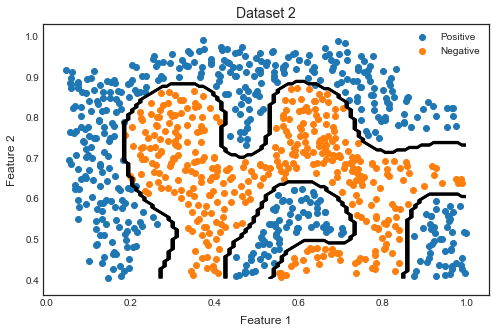

In [45]:
# Fronteira de decisão
visualizeBoundary(df2, X, grid_search.best_estimator_, True)

### Efeito Gamma

In [46]:
# Definindo função para comparar valores de C
def nonLinearComparisonGamma(df, X, y):
    """docstring for nonLinearComparisonGamma:
    função responsável por receber entradas do usuário de modo a plotar diferentes
    fronteiras de decisão para o hiperparâmetro gamma"""
    
    # Inicializando índices e lista
    gamma_values = []
    idx_i = 0
    idx_j = 0

    # Armazenando valores de C
    for i in range(9):
        gamma_values.append(float(input(f'Digite o {i+1}º valor (entre 9) de gamma: ')))

    # Criando figure e eixos
    fig, axs = plt.subplots(figsize=(13, 9), nrows=3, ncols=3)
    
    # Laço para plotagens
    for g in gamma_values:
        
        # Treinando modelo com cada valor de C
        svm_clf = SVC(kernel='rbf', gamma=g)
        svm_clf.fit(X, y)
        
        # Preparando plotagem
        pos = df[df.iloc[:, 2] == 1]
        neg = df[df.iloc[:, 2] == 0]
        X1, X2, vals = getContour(X, svm_clf)

        # Preparando plotagem
        axs[idx_i, idx_j].scatter(pos.iloc[:, 0], pos.iloc[:, 1], label='Positive')
        axs[idx_i, idx_j].scatter(neg.iloc[:, 0], neg.iloc[:, 1], label='Negative')
        axs[idx_i, idx_j].contour(X1, X2, vals, colors='black')
        axs[idx_i, idx_j].set_title(f'gamma = {g}', size=14)
        axs[idx_i, idx_j].set_xlabel('Feature 1', size=12, labelpad=8)
        axs[idx_i, idx_j].set_ylabel('Feature 2', size=12, labelpad=8)
        fig.suptitle('SVM - Fronteiras de Decisão: Hiperparâmetro gamma', size=16)
        
        # Atualizando índices
        idx_j += 1
        if gamma_values.index(g) in (2, 5):
            idx_i += 1
            idx_j = 0
        
        
        fig.tight_layout(rect=[0, 0.06, 1, 0.95])

Digite o 1º valor (entre 9) de gamma: 1
Digite o 2º valor (entre 9) de gamma: 5
Digite o 3º valor (entre 9) de gamma: 10
Digite o 4º valor (entre 9) de gamma: 15
Digite o 5º valor (entre 9) de gamma: 20
Digite o 6º valor (entre 9) de gamma: 25
Digite o 7º valor (entre 9) de gamma: 30
Digite o 8º valor (entre 9) de gamma: 50
Digite o 9º valor (entre 9) de gamma: 75


C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


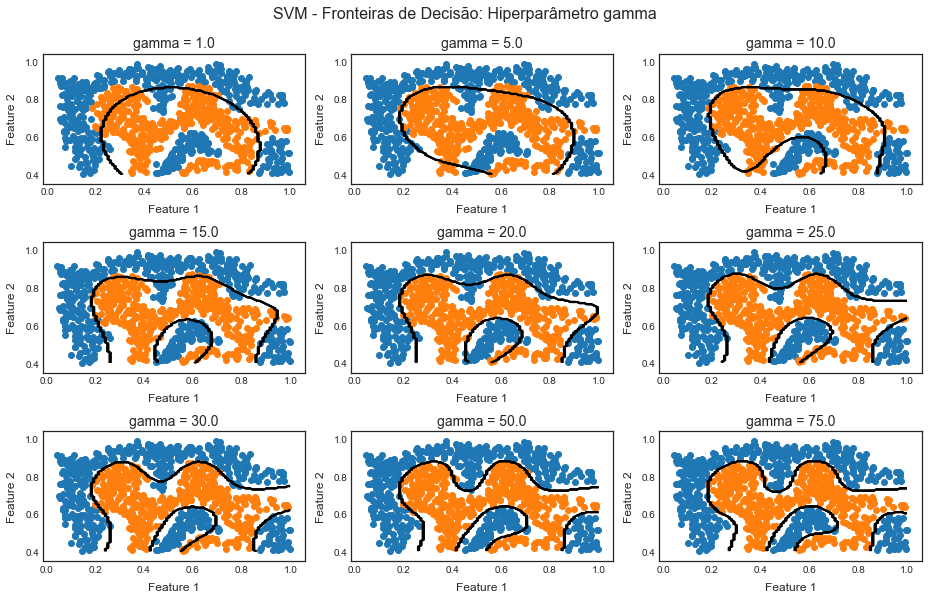

In [47]:
# Testando função
nonLinearComparisonGamma(df2, X, y)

## Dataset 3

Vejamos o que o terceiro dataset contém.

### Explorando os Dados

In [48]:
# Lendo os dados
data3 = sio.loadmat('ex6data3.mat')

# Verificando
data3

{'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-01, -3.30409e-01],
        [-2.18894e-01, -4.23977e-01],
        [-8.06452e-02, -5.64327e-01],
        [ 6.68203e-02, -5.17544e-01],
       

In [49]:
# Indexando variáveis
X = data3['X']
y = data3['y']

# Transformando em dataframe
df3 = pd.DataFrame(X, columns=['x1', 'x2'])
df3['label'] = y

# Visualizando
df3.head()

x1        x2  label
0 -0.158986  0.423977      1
1 -0.347926  0.470760      1
2 -0.504608  0.353801      1
3 -0.596774  0.114035      1
4 -0.518433 -0.172515      1

In [50]:
# Verificando quantidade de linhas
df3.shape

(211, 3)

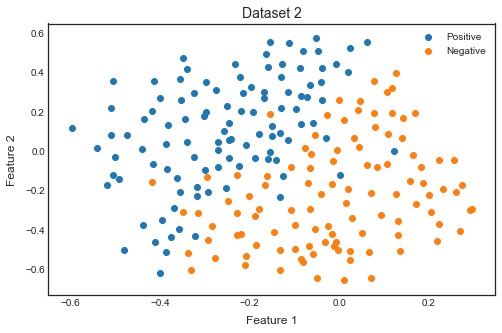

In [51]:
# Plotando dados
plotDataset2(df3)

### Treinando um Modelo

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

Acurácia nos dados de treino: 0.90
Acurácia em validação cruzada: 0.82


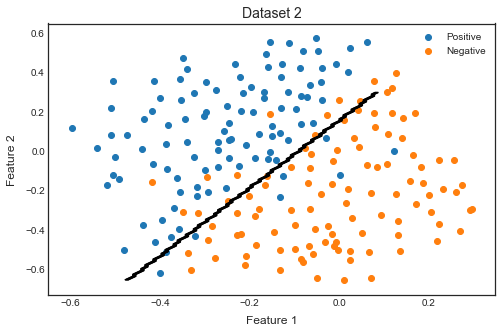

In [52]:
# Importando biblioteca
from sklearn.svm import SVC

# Treinando modelo
svm_clf = SVC(kernel='linear')
svm_clf.fit(X, y)

# Acurácia nos dados de treino
pred_train = svm_clf.predict(X)
acc_train = accuracy_score(y, pred_train)
print(f'Acurácia nos dados de treino: {acc_train:.2f}')

# Acurácia nos dados de validação
y_scores = cross_val_score(svm_clf, X, y)
print(f'Acurácia em validação cruzada: {y_scores.mean():.2f}')

# Testando função
visualizeBoundary(df3, X, svm_clf, True)

In [53]:
# Importando biblioteca
from sklearn.model_selection import GridSearchCV

# Definindo parâmetros para SVM
param_grid_svm = [
    {
        'kernel': ['rbf'],
        'C': np.linspace(1, 50, 25),
        'gamma': np.linspace(1, 100, 50)
    }
]

# Criando classificador
svm_clf = SVC()

# Treinando e procurando melhor combinação
grid_search = GridSearchCV(svm_clf, param_grid_svm, cv=3, scoring='accuracy', verbose=4)
grid_search.fit(X, y)

Fitting 3 folds for each of 1250 candidates, totalling 3750 fits
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=1.0, gamma=1.0, kernel=rbf ....................................
[CV]  C=1.0, gamma=1.0, kernel=rbf, score=0.6285714285714286, total=   0.0s
[CV] C=1.0, gamma=3.020408163265306, kernel=rbf ......................
[CV]  C=1.0, gamma=3.020408163265306, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=1.0, gamma=3.020408163265306, kernel=rbf ......................
[CV]  C=1.0, gamma=3.020408163265306, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=1.0, gamma=3.020408163265306, kernel=rbf ......................
[CV]  C=1.0, gamma=3.020408163265306, kernel=rbf, score=0.6571428571428571, total=   0.0s
[CV] C=1.0,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Do

[CV]  C=1.0, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=1.0, gamma=37.367346938775505, kernel=rbf .....................
[CV]  C=1.0, gamma=37.367346938775505, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=1.0, gamma=37.367346938775505, kernel=rbf .....................
[CV]  C=1.0, gamma=37.367346938775505, kernel=rbf, score=0.7285714285714285, total=   0.0s
[CV] C=1.0, gamma=39.38775510204081, kernel=rbf ......................
[CV]  C=1.0, gamma=39.38775510204081, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=1.0, gamma=39.38775510204081, kernel=rbf ......................
[CV]  C=1.0, gamma=39.38775510204081, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=1.0, gamma=39.38775510204081, kernel=rbf ......................
[CV]  C=1.0, gamma=39.38775510204081, kernel=rbf, score=0.7285714285714285, total=   0.0s
[CV] C=1.0, gamma=41.408163265306115, kernel=rbf .....................
[CV]  C=1.0, gamma=41.408163265

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=1.0, gamma=77.77551020408163, kernel=rbf, score=0.7428571428571429, total=   0.0s
[CV] C=1.0, gamma=79.79591836734693, kernel=rbf ......................
[CV]  C=1.0, gamma=79.79591836734693, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=1.0, gamma=79.79591836734693, kernel=rbf ......................
[CV]  C=1.0, gamma=79.79591836734693, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=1.0, gamma=79.79591836734693, kernel=rbf ......................
[CV]  C=1.0, gamma=79.79591836734693, kernel=rbf, score=0.7428571428571429, total=   0.0s
[CV] C=1.0, gamma=81.81632653061223, kernel=rbf ......................
[CV]  C=1.0, gamma=81.81632653061223, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=1.0, gamma=81.81632653061223, kernel=rbf ......................
[CV]  C=1.0, gamma=81.81632653061223, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=1.0, gamma=81.81632653061223, kernel=rbf ......................
[CV]  C=1.0, gamma=81.816326530612

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=13.122448979591836, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=15.142857142857142, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=3.0416666666666665, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=3.0416666666666665, gamma=17.163265306122447, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=3.

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=53.53061224489795, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=55.55102040816326, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=3.041666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=3.0416666666666665, gamma=93.93877551020407, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=3.0416666666666665, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=93.93877551020407, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=3.0416666666666665, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=93.93877551020407, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=3.0416666666666665, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=95.95918367346938, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=3.0416666666666665, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=95.95918367346938, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=3.0416666666666665, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=3.0416666666666665, gamma=95.95918367346938, kernel=rbf, score=0.8, total=   0.0s
[CV] C=3.0416666666666665, gam

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=31.30612244897959, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=5.083333333333333, gamma=33.326530612244895, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=33.326530612244895, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=5.083333333333333, gamma=33.326530612244895, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=33.326530612244895, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=5.083333333333333, gamma=33.326530612244895, kernel=rbf .......
[CV]  C=5.083333333333333, gamma=33.326530612244895, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=5.083333333333333, gamma=35.3469387755102, kernel=rbf .........
[CV]  C=5.083333333333333, gamma=35.3469387755102, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=5.083333333333333, gamma=35.3469387755102, kernel=rbf .........
[CV]  C=5.083333333333333, gamma=35.3469387755102, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=5.08333333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=5.083333333333333, gamma=69.6938775510204, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=5.083333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=71.71428571428571, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=5.083333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=71.71428571428571, kernel=rbf, score=0.9, total=   0.0s
[CV] C=5.083333333333333, gamma=71.71428571428571, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=71.71428571428571, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=5.083333333333333, gamma=73.73469387755101, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=73.73469387755101, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=5.083333333333333, gamma=73.73469387755101, kernel=rbf ........
[CV]  C=5.083333333333333, gamma=73.73469387755101, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=5.083333333333333, gamma=73.73

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=7.061224489795918, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=7.125, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=7.125, gamma=7.061224489795918, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=7.125, gamma=7.061224489795918, kernel=rbf ....................
[CV]  C=7.125, gamma=7.061224489795918, kernel=rbf, score=0.7571428571428571, total=   0.0s
[CV] C=7.125, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=7.125, gamma=9.081632653061224, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=7.125, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=7.125, gamma=9.081632653061224, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=7.125, gamma=9.081632653061224, kernel=rbf ....................
[CV]  C=7.125, gamma=9.081632653061224, kernel=rbf, score=0.7571428571428571, total=   0.0s
[CV] C=7.125, gamma=11.102040816326529, kernel=rbf ...................
[CV]  C=7.125, gamma=1

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=45.44897959183673, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=7.125, gamma=47.469387755102034, kernel=rbf ...................
[CV]  C=7.125, gamma=47.469387755102034, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=7.125, gamma=47.469387755102034, kernel=rbf ...................
[CV]  C=7.125, gamma=47.469387755102034, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=7.125, gamma=47.469387755102034, kernel=rbf ...................
[CV]  C=7.125, gamma=47.469387755102034, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=7.125, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=7.125, gamma=49.48979591836734, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=7.125, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=7.125, gamma=49.48979591836734, kernel=rbf, score=0.9, total=   0.0s
[CV] C=7.125, gamma=49.48979591836734, kernel=rbf ....................
[CV]  C=7.125, gamma=49.4897959183

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=7.125, gamma=85.85714285714285, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=7.125, gamma=87.87755102040815, kernel=rbf ....................
[CV]  C=7.125, gamma=87.87755102040815, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=7.125, gamma=87.87755102040815, kernel=rbf ....................
[CV]  C=7.125, gamma=87.87755102040815, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=7.125, gamma=87.87755102040815, kernel=rbf ....................
[CV]  C=7.125, gamma=87.87755102040815, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=7.125, gamma=89.89795918367346, kernel=rbf ....................
[CV]  C=7.125, gamma=89.89795918367346, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=7.125, gamma=89.89795918367346, kernel=rbf ....................
[CV]  C=7.125, gamma=89.89795918367346, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=7.125, gamma=89.89795918367346, kernel=rbf ....................
[CV]  C=7.125, gamma=8

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=25.24489795918367, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=9.166666666666666, gamma=25.24489795918367, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=25.24489795918367, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=9.166666666666666, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=27.265306122448976, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=9.166666666666666, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=27.265306122448976, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=9.166666666666666, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=27.265306122448976, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=9.166666666666666, gamma=29.285714285714285, kernel=rbf .......
[CV]  C=9.166666666666666, gamma=29.285714285714285, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=9.16666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=57.57142857142857, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=9.166666666666666, gamma=57.57142857142857, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=57.57142857142857, kernel=rbf, score=0.8, total=   0.0s
[CV] C=9.166666666666666, gamma=59.59183673469387, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=59.59183673469387, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=9.166666666666666, gamma=59.59183673469387, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=59.59183673469387, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=9.166666666666666, gamma=59.59183673469387, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=59.59183673469387, kernel=rbf, score=0.8, total=   0.0s
[CV] C=9.166666666666666, gamma=61.61224489795918, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=61.61224489795918, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=9.166666666666666, gamma=61.61224489795918, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=9.166666666666666, gamma=95.95918367346938, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=9.166666666666666, gamma=95.95918367346938, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=95.95918367346938, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=9.166666666666666, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=97.97959183673468, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=9.166666666666666, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=97.97959183673468, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=9.166666666666666, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=9.166666666666666, gamma=97.97959183673468, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=9.166666666666666, gamma=100.0, kernel=rbf ....................
[CV]  C=9.166666666666666, gamma=100.0, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=9.166666666666666, gamma=1

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=35.3469387755102, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=11.208333333333332, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=11.208333333333332, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=37.367346938775505, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=11.208333333333332, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=11.208333333333332, gamma=37.367346938775505, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=11.208333333333332, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=39.38775510204081, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=11.208333333333332, gamma=39.38775510204081, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=39.38775510204081, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=11.208

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=11.208333333333332, gamma=73.73469387755101, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=11.208333333333332, gamma=75.75510204081633, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=75.75510204081633, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=11.208333333333332, gamma=75.75510204081633, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=75.75510204081633, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=11.208333333333332, gamma=75.75510204081633, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=75.75510204081633, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=11.208333333333332, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=77.77551020408163, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=11.208333333333332, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=11.208333333333332, gamma=77.77551020408163, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=11.20833

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=13.122448979591836, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=13.25, gamma=13.122448979591836, kernel=rbf ...................
[CV]  C=13.25, gamma=13.122448979591836, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=13.25, gamma=13.122448979591836, kernel=rbf ...................
[CV]  C=13.25, gamma=13.122448979591836, kernel=rbf, score=0.8, total=   0.0s
[CV] C=13.25, gamma=15.142857142857142, kernel=rbf ...................
[CV]  C=13.25, gamma=15.142857142857142, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=13.25, gamma=15.142857142857142, kernel=rbf ...................
[CV]  C=13.25, gamma=15.142857142857142, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=13.25, gamma=15.142857142857142, kernel=rbf ...................
[CV]  C=13.25, gamma=15.142857142857142, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=13.25, gamma=17.163265306122447, kernel=rbf ...................
[CV]  C=13.25, gamma=17.1632653

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=13.25, gamma=51.51020408163265, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=13.25, gamma=51.51020408163265, kernel=rbf ....................
[CV]  C=13.25, gamma=51.51020408163265, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=13.25, gamma=51.51020408163265, kernel=rbf ....................
[CV]  C=13.25, gamma=51.51020408163265, kernel=rbf, score=0.8, total=   0.0s
[CV] C=13.25, gamma=53.53061224489795, kernel=rbf ....................
[CV]  C=13.25, gamma=53.53061224489795, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=13.25, gamma=53.53061224489795, kernel=rbf ....................
[CV]  C=13.25, gamma=53.53061224489795, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=13.25, gamma=53.53061224489795, kernel=rbf ....................
[CV]  C=13.25, gamma=53.53061224489795, kernel=rbf, score=0.8, total=   0.0s
[CV] C=13.25, gamma=55.55102040816326, kernel=rbf ....................
[CV]  C=13.25, gamma=55.55102040816326, kernel=rbf, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=13.25, gamma=93.93877551020407, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=13.25, gamma=93.93877551020407, kernel=rbf ....................
[CV]  C=13.25, gamma=93.93877551020407, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=13.25, gamma=93.93877551020407, kernel=rbf ....................
[CV]  C=13.25, gamma=93.93877551020407, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=13.25, gamma=95.95918367346938, kernel=rbf ....................
[CV]  C=13.25, gamma=95.95918367346938, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=13.25, gamma=95.95918367346938, kernel=rbf ....................
[CV]  C=13.25, gamma=95.95918367346938, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=13.25, gamma=95.95918367346938, kernel=rbf ....................
[CV]  C=13.25, gamma=95.95918367346938, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=13.25, gamma=97.97959183673468, kernel=rbf ....................
[CV]  C=13.25, gamma=

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=33.326530612244895, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=15.291666666666666, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=33.326530612244895, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=15.291666666666666, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=15.291666666666666, gamma=33.326530612244895, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=15.291666666666666, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=15.291666666666666, gamma=35.3469387755102, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=15.291666666666666, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=15.291666666666666, gamma=35.3469387755102, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=15.291666666666666, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=15.291666666666666, gamma=35.3469387755102, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=15.29166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=65.65306122448979, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=15.291666666666666, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=67.67346938775509, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=15.291666666666666, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=67.67346938775509, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=15.291666666666666, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=67.67346938775509, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=15.291666666666666, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=15.291666666666666, gamma=69.6938775510204, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=15.291666666666666, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=15.291666666666666, gamma=69.6938775510204, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=15.2916666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=15.291666666666666, gamma=79.79591836734693, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=15.291666666666666, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=81.81632653061223, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=15.291666666666666, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=81.81632653061223, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=15.291666666666666, gamma=81.81632653061223, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=81.81632653061223, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=15.291666666666666, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=83.83673469387755, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=15.291666666666666, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=83.83673469387755, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=15.2916

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=15.291666666666666, gamma=93.93877551020407, kernel=rbf, score=0.7571428571428571, total=   0.0s
[CV] C=15.291666666666666, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=95.95918367346938, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=15.291666666666666, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=95.95918367346938, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=15.291666666666666, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=95.95918367346938, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=15.291666666666666, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=97.97959183673468, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=15.291666666666666, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=15.291666666666666, gamma=97.97959183673468, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=15.29166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=15.142857142857142, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=17.333333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=17.163265306122447, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=17.333333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=17.163265306122447, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=17.333333333333332, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=17.163265306122447, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=17.333333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=19.183673469387752, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=17.333333333333332, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=19.183673469387752, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=17

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=17.333333333333332, gamma=43.42857142857142, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=17.333333333333332, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=43.42857142857142, kernel=rbf, score=0.8, total=   0.0s
[CV] C=17.333333333333332, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=45.44897959183673, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=17.333333333333332, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=45.44897959183673, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=17.333333333333332, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=45.44897959183673, kernel=rbf, score=0.8, total=   0.0s
[CV] C=17.333333333333332, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=17.333333333333332, gamma=47.469387755102034, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=17.333333333333332, gamma=47.4693877

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=69.6938775510204, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=17.333333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=71.71428571428571, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=17.333333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=71.71428571428571, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=17.333333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=71.71428571428571, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=17.333333333333332, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=73.73469387755101, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=17.333333333333332, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=73.73469387755101, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=17.333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=17.333333333333332, gamma=95.95918367346938, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=17.333333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=97.97959183673468, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=17.333333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=97.97959183673468, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=17.333333333333332, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=17.333333333333332, gamma=97.97959183673468, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=17.333333333333332, gamma=100.0, kernel=rbf ...................
[CV]  C=17.333333333333332, gamma=100.0, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=17.333333333333332, gamma=100.0, kernel=rbf ...................
[CV]  C=17.333333333333332, gamma=100.0, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=17.333333333333332, gamma=100.0,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=27.265306122448976, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=19.375, gamma=27.265306122448976, kernel=rbf ..................
[CV]  C=19.375, gamma=27.265306122448976, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=19.375, gamma=27.265306122448976, kernel=rbf ..................
[CV]  C=19.375, gamma=27.265306122448976, kernel=rbf, score=0.9, total=   0.0s
[CV] C=19.375, gamma=29.285714285714285, kernel=rbf ..................
[CV]  C=19.375, gamma=29.285714285714285, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=19.375, gamma=29.285714285714285, kernel=rbf ..................
[CV]  C=19.375, gamma=29.285714285714285, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=19.375, gamma=29.285714285714285, kernel=rbf ..................
[CV]  C=19.375, gamma=29.285714285714285, kernel=rbf, score=0.9, total=   0.0s
[CV] C=19.375, gamma=31.30612244897959, kernel=rbf ...................
[CV]  C=19.375, gamma=31.30612244897959,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=51.51020408163265, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=19.375, gamma=51.51020408163265, kernel=rbf ...................
[CV]  C=19.375, gamma=51.51020408163265, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=19.375, gamma=51.51020408163265, kernel=rbf ...................
[CV]  C=19.375, gamma=51.51020408163265, kernel=rbf, score=0.8, total=   0.0s
[CV] C=19.375, gamma=53.53061224489795, kernel=rbf ...................
[CV]  C=19.375, gamma=53.53061224489795, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=19.375, gamma=53.53061224489795, kernel=rbf ...................
[CV]  C=19.375, gamma=53.53061224489795, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=19.375, gamma=53.53061224489795, kernel=rbf ...................
[CV]  C=19.375, gamma=53.53061224489795, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=19.375, gamma=55.55102040816326, kernel=rbf ...................
[CV]  C=19.375, gamma=55.551020

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=19.375, gamma=77.77551020408163, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=19.375, gamma=77.77551020408163, kernel=rbf ...................
[CV]  C=19.375, gamma=77.77551020408163, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=19.375, gamma=79.79591836734693, kernel=rbf ...................
[CV]  C=19.375, gamma=79.79591836734693, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=19.375, gamma=79.79591836734693, kernel=rbf ...................
[CV]  C=19.375, gamma=79.79591836734693, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=19.375, gamma=79.79591836734693, kernel=rbf ...................
[CV]  C=19.375, gamma=79.79591836734693, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=19.375, gamma=81.81632653061223, kernel=rbf ...................
[CV]  C=19.375, gamma=81.81632653061223, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=19.375, gamma=81.81632653061223, kernel=rbf ...................
[CV]  C=19.375, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=21.416666666666664, gamma=5.040816326530612, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=21.416666666666664, gamma=5.040816326530612, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=5.040816326530612, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=21.416666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=7.061224489795918, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=21.416666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=7.061224489795918, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=21.416666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=7.061224489795918, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=21.416666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=9.081632653061224, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=21.4166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=33.326530612244895, kernel=rbf, score=0.9, total=   0.0s
[CV] C=21.416666666666664, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=33.326530612244895, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=21.416666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=21.416666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=21.416666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=21.416666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=21.416666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=21.416666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=21.416666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=21.416666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=21.416666666666664, gam

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=21.416666666666664, gamma=61.61224489795918, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=21.416666666666664, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=63.63265306122448, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=21.416666666666664, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=63.63265306122448, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=21.416666666666664, gamma=63.63265306122448, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=63.63265306122448, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=21.416666666666664, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=65.65306122448979, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=21.416666666666664, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=65.65306122448979, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=21.4166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=21.416666666666664, gamma=81.81632653061223, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=21.416666666666664, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=83.83673469387755, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=21.416666666666664, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=83.83673469387755, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=21.416666666666664, gamma=83.83673469387755, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=83.83673469387755, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=21.416666666666664, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=85.85714285714285, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=21.416666666666664, gamma=85.85714285714285, kernel=rbf .......
[CV]  C=21.416666666666664, gamma=85.85714285714285, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=21.41666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=7.061224489795918, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=23.458333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=9.081632653061224, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=23.458333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=9.081632653061224, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=23.458333333333332, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=9.081632653061224, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=23.458333333333332, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=11.102040816326529, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=23.458333333333332, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=23.458333333333332, gamma=11.102040816326529, kernel=rbf, score=0.9714285714285714, total=   0.0s
[CV] C=23.458

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=43.42857142857142, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=23.458333333333332, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=43.42857142857142, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=23.458333333333332, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=43.42857142857142, kernel=rbf, score=0.8, total=   0.0s
[CV] C=23.458333333333332, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=45.44897959183673, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=23.458333333333332, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=45.44897959183673, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=23.458333333333332, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=45.44897959183673, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=23.458333333333332, gam

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=65.65306122448979, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=23.458333333333332, gamma=65.65306122448979, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=65.65306122448979, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=23.458333333333332, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=67.67346938775509, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=23.458333333333332, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=67.67346938775509, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=23.458333333333332, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=23.458333333333332, gamma=67.67346938775509, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=23.458333333333332, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=23.458333333333332, gamma=69.6938775510204, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=23.458333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=23.458333333333332, gamma=100.0, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=23.458333333333332, gamma=100.0, kernel=rbf ...................
[CV]  C=23.458333333333332, gamma=100.0, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=23.458333333333332, gamma=100.0, kernel=rbf ...................
[CV]  C=23.458333333333332, gamma=100.0, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=25.5, gamma=1.0, kernel=rbf ...................................
[CV]  C=25.5, gamma=1.0, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=25.5, gamma=1.0, kernel=rbf ...................................
[CV]  C=25.5, gamma=1.0, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=25.5, gamma=1.0, kernel=rbf ...................................
[CV]  C=25.5, gamma=1.0, kernel=rbf, score=0.7428571428571429, total=   0.0s
[CV] C=25.5, gamma=3.020408163265306, kernel=rbf .....................
[CV]  C=25.5, gamma=3.020408163265306, kernel=rbf, score=0.90140

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=37.367346938775505, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=25.5, gamma=39.38775510204081, kernel=rbf .....................
[CV]  C=25.5, gamma=39.38775510204081, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=25.5, gamma=39.38775510204081, kernel=rbf .....................
[CV]  C=25.5, gamma=39.38775510204081, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=25.5, gamma=39.38775510204081, kernel=rbf .....................
[CV]  C=25.5, gamma=39.38775510204081, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=25.5, gamma=41.408163265306115, kernel=rbf ....................
[CV]  C=25.5, gamma=41.408163265306115, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=25.5, gamma=41.408163265306115, kernel=rbf ....................
[CV]  C=25.5, gamma=41.408163265306115, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=25.5, gamma=41.408163265306115, kernel=rbf ....................
[CV]  C=25.5, gamma=41.40

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=25.5, gamma=77.77551020408163, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=25.5, gamma=77.77551020408163, kernel=rbf .....................
[CV]  C=25.5, gamma=77.77551020408163, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=25.5, gamma=79.79591836734693, kernel=rbf .....................
[CV]  C=25.5, gamma=79.79591836734693, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=25.5, gamma=79.79591836734693, kernel=rbf .....................
[CV]  C=25.5, gamma=79.79591836734693, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=25.5, gamma=79.79591836734693, kernel=rbf .....................
[CV]  C=25.5, gamma=79.79591836734693, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=25.5, gamma=81.81632653061223, kernel=rbf .....................
[CV]  C=25.5, gamma=81.81632653061223, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=25.5, gamma=81.81632653061223, kernel=rbf .....................
[CV]  C=25.5, gamma=81.81632

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=15.142857142857142, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=27.541666666666664, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=17.163265306122447, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=27.541666666666664, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=17.163265306122447, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=27.541666666666664, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=17.163265306122447, kernel=rbf, score=0.9, total=   0.0s
[CV] C=27.541666666666664, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=19.183673469387752, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=27.541666666666664, gamma=19.183673469387752, kernel=rbf ......
[CV]  C=27.541666666666664, gamma=19.183673469387752, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=27.54166666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=53.53061224489795, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=27.541666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=55.55102040816326, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=27.541666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=55.55102040816326, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=27.541666666666664, gamma=55.55102040816326, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=55.55102040816326, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=27.541666666666664, gamma=57.57142857142857, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=57.57142857142857, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=27.541666666666664, gamma=57.57142857142857, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=57.57142857142857, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=27.54166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=27.541666666666664, gamma=89.89795918367346, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=27.541666666666664, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=89.89795918367346, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=27.541666666666664, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=89.89795918367346, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=27.541666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=91.91836734693877, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=27.541666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=91.91836734693877, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=27.541666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=27.541666666666664, gamma=91.91836734693877, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=27.54166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=29.583333333333332, gamma=27.265306122448976, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=29.583333333333332, gamma=29.285714285714285, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=29.285714285714285, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=29.583333333333332, gamma=29.285714285714285, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=29.285714285714285, kernel=rbf, score=0.9, total=   0.0s
[CV] C=29.583333333333332, gamma=29.285714285714285, kernel=rbf ......
[CV]  C=29.583333333333332, gamma=29.285714285714285, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=29.583333333333332, gamma=31.30612244897959, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=31.30612244897959, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=29.583333333333332, gamma=31.30612244897959, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=31.30612244897959, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=29.583333333333332,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=29.583333333333332, gamma=67.67346938775509, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=29.583333333333332, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=29.583333333333332, gamma=69.6938775510204, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=29.583333333333332, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=29.583333333333332, gamma=69.6938775510204, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=29.583333333333332, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=29.583333333333332, gamma=69.6938775510204, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=29.583333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=71.71428571428571, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=29.583333333333332, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=29.583333333333332, gamma=71.71428571428571, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=29.58333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=7.061224489795918, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=31.624999999999996, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=7.061224489795918, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=31.624999999999996, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=9.081632653061224, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=31.624999999999996, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=9.081632653061224, kernel=rbf, score=0.9714285714285714, total=   0.0s
[CV] C=31.624999999999996, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=9.081632653061224, kernel=rbf, score=0.8, total=   0.0s
[CV] C=31.624999999999996, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=11.102040816326529, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=31.624999999999996, ga

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=45.44897959183673, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=31.624999999999996, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=45.44897959183673, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=31.624999999999996, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=47.469387755102034, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=31.624999999999996, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=47.469387755102034, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=31.624999999999996, gamma=47.469387755102034, kernel=rbf ......
[CV]  C=31.624999999999996, gamma=47.469387755102034, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=31.624999999999996, gamma=49.48979591836734, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=49.48979591836734, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=31.62

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=75.75510204081633, kernel=rbf, score=0.8, total=   0.0s
[CV] C=31.624999999999996, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=77.77551020408163, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=31.624999999999996, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=77.77551020408163, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=31.624999999999996, gamma=77.77551020408163, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=77.77551020408163, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=31.624999999999996, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=79.79591836734693, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=31.624999999999996, gamma=79.79591836734693, kernel=rbf .......
[CV]  C=31.624999999999996, gamma=79.79591836734693, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=31.624999999999996, gam

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=31.624999999999996, gamma=100.0, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=33.666666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=33.666666666666664, gamma=1.0, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=33.666666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=33.666666666666664, gamma=1.0, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=33.666666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=33.666666666666664, gamma=1.0, kernel=rbf, score=0.7428571428571429, total=   0.0s
[CV] C=33.666666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=3.020408163265306, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=33.666666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=3.020408163265306, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=33.666666666666664, gamma=3.020408163265306, kernel=rbf ......

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.666666666666664, gamma=33.326530612244895, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=33.666666666666664, gamma=33.326530612244895, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=33.326530612244895, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=33.666666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=33.666666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=33.666666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=33.666666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=33.666666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=33.666666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=33.666666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=33.666666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=33.66666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=33.666666666666664, gamma=69.6938775510204, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=33.666666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=33.666666666666664, gamma=69.6938775510204, kernel=rbf, score=0.8, total=   0.0s
[CV] C=33.666666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=33.666666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=71.71428571428571, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=33.666666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=71.71428571428571, kernel=rbf, score=0.8, total=   0.0s
[CV] C=33.666666666666664, gamma=73.73469387755101, kernel=rbf .......
[CV]  C=33.666666666666664, gamma=73.73469387755101, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=33.666666666666664, gamma=73.73469387755

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=5.040816326530612, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=35.70833333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=5.040816326530612, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=35.70833333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=5.040816326530612, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=35.70833333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=7.061224489795918, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=35.70833333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=7.061224489795918, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=35.70833333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=7.061224489795918, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=35.70833333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=35.70833333333333, gamma=37.367346938775505, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=37.367346938775505, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=35.70833333333333, gamma=37.367346938775505, kernel=rbf .......
[CV]  C=35.70833333333333, gamma=37.367346938775505, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=35.70833333333333, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=39.38775510204081, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=35.70833333333333, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=39.38775510204081, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=35.70833333333333, gamma=39.38775510204081, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=39.38775510204081, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=35.70833333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=35.70833333333333, gamma=63.63265306122448, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=35.70833333333333, gamma=63.63265306122448, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=63.63265306122448, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=35.70833333333333, gamma=65.65306122448979, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=65.65306122448979, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=35.70833333333333, gamma=65.65306122448979, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=65.65306122448979, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=35.70833333333333, gamma=65.65306122448979, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=65.65306122448979, kernel=rbf, score=0.8, total=   0.0s
[CV] C=35.70833333333333, gamma=67.67346938775509, kernel=rbf ........
[CV]  C=35.70833333333333, gamma=67.67346938775509, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=35.70833333333333, gamma=67.

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=35.70833333333333, gamma=100.0, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=35.70833333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=35.70833333333333, gamma=100.0, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=35.70833333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=35.70833333333333, gamma=100.0, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=37.75, gamma=1.0, kernel=rbf ..................................
[CV]  C=37.75, gamma=1.0, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=37.75, gamma=1.0, kernel=rbf ..................................
[CV]  C=37.75, gamma=1.0, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=37.75, gamma=1.0, kernel=rbf ..................................
[CV]  C=37.75, gamma=1.0, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=37.75, gamma=3.020408163265306, kernel=rbf ....................
[CV]  C=37.75, gamma=3.020408163265306, kernel=rbf, score=0.9014

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=37.75, gamma=37.367346938775505, kernel=rbf ...................
[CV]  C=37.75, gamma=37.367346938775505, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=37.75, gamma=37.367346938775505, kernel=rbf ...................
[CV]  C=37.75, gamma=37.367346938775505, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=37.75, gamma=39.38775510204081, kernel=rbf ....................
[CV]  C=37.75, gamma=39.38775510204081, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=37.75, gamma=39.38775510204081, kernel=rbf ....................
[CV]  C=37.75, gamma=39.38775510204081, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=37.75, gamma=39.38775510204081, kernel=rbf ....................
[CV]  C=37.75, gamma=39.38775510204081, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=37.75, gamma=41.408163265306115, kernel=rbf ...................
[CV]  C=37.75, gamm

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=37.75, gamma=69.6938775510204, kernel=rbf, score=0.8, total=   0.0s
[CV] C=37.75, gamma=71.71428571428571, kernel=rbf ....................
[CV]  C=37.75, gamma=71.71428571428571, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=37.75, gamma=71.71428571428571, kernel=rbf ....................
[CV]  C=37.75, gamma=71.71428571428571, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=37.75, gamma=71.71428571428571, kernel=rbf ....................
[CV]  C=37.75, gamma=71.71428571428571, kernel=rbf, score=0.8, total=   0.0s
[CV] C=37.75, gamma=73.73469387755101, kernel=rbf ....................
[CV]  C=37.75, gamma=73.73469387755101, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=37.75, gamma=73.73469387755101, kernel=rbf ....................
[CV]  C=37.75, gamma=73.73469387755101, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=37.75, gamma=73.73469387755101, kernel=rbf ....................
[CV]  C=37.75, gamma=73.73469387755101, kernel=rbf, s

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=1.0, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=39.791666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=39.791666666666664, gamma=1.0, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=39.791666666666664, gamma=1.0, kernel=rbf .....................
[CV]  C=39.791666666666664, gamma=1.0, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=39.791666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=3.020408163265306, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=39.791666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=3.020408163265306, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=39.791666666666664, gamma=3.020408163265306, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=3.020408163265306, kernel=rbf, score=0.7428571428571429, total=   0.0s
[CV] C=39.791666666666664, gamma=5.040816326530612, kerne

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=13.122448979591836, kernel=rbf, score=0.9571428571428572, total=   0.0s
[CV] C=39.791666666666664, gamma=13.122448979591836, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=13.122448979591836, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=39.791666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=15.142857142857142, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=39.791666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=15.142857142857142, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=39.791666666666664, gamma=15.142857142857142, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=15.142857142857142, kernel=rbf, score=0.9, total=   0.0s
[CV] C=39.791666666666664, gamma=17.163265306122447, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=17.163265306122447, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=39.79166666666666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=41.408163265306115, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=39.791666666666664, gamma=41.408163265306115, kernel=rbf ......
[CV]  C=39.791666666666664, gamma=41.408163265306115, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=39.791666666666664, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=43.42857142857142, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=39.791666666666664, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=43.42857142857142, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=39.791666666666664, gamma=43.42857142857142, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=43.42857142857142, kernel=rbf, score=0.8, total=   0.0s
[CV] C=39.791666666666664, gamma=45.44897959183673, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=45.44897959183673, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=39.791666666666664, g

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=67.67346938775509, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=39.791666666666664, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=67.67346938775509, kernel=rbf, score=0.8, total=   0.0s
[CV] C=39.791666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=39.791666666666664, gamma=69.6938775510204, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=39.791666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=39.791666666666664, gamma=69.6938775510204, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=39.791666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=39.791666666666664, gamma=69.6938775510204, kernel=rbf, score=0.8, total=   0.0s
[CV] C=39.791666666666664, gamma=71.71428571428571, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=71.71428571428571, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=39.791666666666664, gamma=71.714285714285

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=39.791666666666664, gamma=93.93877551020407, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=39.791666666666664, gamma=93.93877551020407, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=93.93877551020407, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=39.791666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=95.95918367346938, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=39.791666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=95.95918367346938, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=39.791666666666664, gamma=95.95918367346938, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=95.95918367346938, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=39.791666666666664, gamma=97.97959183673468, kernel=rbf .......
[CV]  C=39.791666666666664, gamma=97.97959183673468, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=39.79166

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=25.24489795918367, kernel=rbf, score=0.9142857142857143, total=   0.0s
[CV] C=41.83333333333333, gamma=25.24489795918367, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=25.24489795918367, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=41.83333333333333, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=27.265306122448976, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=41.83333333333333, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=27.265306122448976, kernel=rbf, score=0.8857142857142857, total=   0.0s
[CV] C=41.83333333333333, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=27.265306122448976, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=41.83333333333333, gamma=29.285714285714285, kernel=rbf .......
[CV]  C=41.83333333333333, gamma=29.285714285714285, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=41.8333333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=49.48979591836734, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=41.83333333333333, gamma=49.48979591836734, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=49.48979591836734, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=41.83333333333333, gamma=51.51020408163265, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=51.51020408163265, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=41.83333333333333, gamma=51.51020408163265, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=51.51020408163265, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=41.83333333333333, gamma=51.51020408163265, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=51.51020408163265, kernel=rbf, score=0.8, total=   0.0s
[CV] C=41.83333333333333, gamma=53.53061224489795, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=53.53061224489795, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=41.83333333333333, gamma=53.5

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=41.83333333333333, gamma=73.73469387755101, kernel=rbf, score=0.8, total=   0.0s
[CV] C=41.83333333333333, gamma=75.75510204081633, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=75.75510204081633, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=41.83333333333333, gamma=75.75510204081633, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=75.75510204081633, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=41.83333333333333, gamma=75.75510204081633, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=75.75510204081633, kernel=rbf, score=0.8, total=   0.0s
[CV] C=41.83333333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=77.77551020408163, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=41.83333333333333, gamma=77.77551020408163, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=77.77551020408163, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=41.83333333333333, gamma=77.77551020408163,

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=41.83333333333333, gamma=97.97959183673468, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=41.83333333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=97.97959183673468, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=41.83333333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=41.83333333333333, gamma=97.97959183673468, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=41.83333333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=41.83333333333333, gamma=100.0, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=41.83333333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=41.83333333333333, gamma=100.0, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=41.83333333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=41.83333333333333, gamma=100.0, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=43.875, gamma=1.0, kernel=rbf ....................

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=43.875, gamma=29.285714285714285, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=43.875, gamma=29.285714285714285, kernel=rbf ..................
[CV]  C=43.875, gamma=29.285714285714285, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=43.875, gamma=31.30612244897959, kernel=rbf ...................
[CV]  C=43.875, gamma=31.30612244897959, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=43.875, gamma=31.30612244897959, kernel=rbf ...................
[CV]  C=43.875, gamma=31.30612244897959, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=43.875, gamma=31.30612244897959, kernel=rbf ...................
[CV]  C=43.875, gamma=31.30612244897959, kernel=rbf, score=0.8428571428571429, total=   0.0s
[CV] C=43.875, gamma=33.326530612244895, kernel=rbf ..................
[CV]  C=43.875, gamma=33.326530612244895, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=43.875, gamma=33.326530612244895, kernel=rbf ..................
[CV]  C=43.87

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


[CV]  C=43.875, gamma=57.57142857142857, kernel=rbf, score=0.8142857142857143, total=   0.0s
[CV] C=43.875, gamma=59.59183673469387, kernel=rbf ...................
[CV]  C=43.875, gamma=59.59183673469387, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=43.875, gamma=59.59183673469387, kernel=rbf ...................
[CV]  C=43.875, gamma=59.59183673469387, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=43.875, gamma=59.59183673469387, kernel=rbf ...................
[CV]  C=43.875, gamma=59.59183673469387, kernel=rbf, score=0.8, total=   0.0s
[CV] C=43.875, gamma=61.61224489795918, kernel=rbf ...................
[CV]  C=43.875, gamma=61.61224489795918, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=43.875, gamma=61.61224489795918, kernel=rbf ...................
[CV]  C=43.875, gamma=61.61224489795918, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=43.875, gamma=61.61224489795918, kernel=rbf ...................
[CV]  C=43.875, gamma=61.61224

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=43.875, gamma=85.85714285714285, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=43.875, gamma=85.85714285714285, kernel=rbf ...................
[CV]  C=43.875, gamma=85.85714285714285, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=43.875, gamma=85.85714285714285, kernel=rbf ...................
[CV]  C=43.875, gamma=85.85714285714285, kernel=rbf, score=0.8, total=   0.0s
[CV] C=43.875, gamma=87.87755102040815, kernel=rbf ...................
[CV]  C=43.875, gamma=87.87755102040815, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=43.875, gamma=87.87755102040815, kernel=rbf ...................
[CV]  C=43.875, gamma=87.87755102040815, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=43.875, gamma=87.87755102040815, kernel=rbf ...................
[CV]  C=43.875, gamma=87.87755102040815, kernel=rbf, score=0.8, total=   0.0s
[CV] C=43.875, gamma=89.89795918367346, kernel=rbf ...................
[CV]  C=43.875, gamma=89.89795918367346, kerne

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=7.061224489795918, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=45.916666666666664, gamma=7.061224489795918, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=7.061224489795918, kernel=rbf, score=0.8, total=   0.0s
[CV] C=45.916666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=9.081632653061224, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=45.916666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=9.081632653061224, kernel=rbf, score=0.9714285714285714, total=   0.0s
[CV] C=45.916666666666664, gamma=9.081632653061224, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=9.081632653061224, kernel=rbf, score=0.8, total=   0.0s
[CV] C=45.916666666666664, gamma=11.102040816326529, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=11.102040816326529, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=45.916666666666664, gamma=11.10204081

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=45.916666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=45.916666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=45.916666666666664, gamma=35.3469387755102, kernel=rbf ........
[CV]  C=45.916666666666664, gamma=35.3469387755102, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=45.916666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=45.916666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=45.916666666666664, gamma=37.367346938775505, kernel=rbf ......
[CV]  C=45.916666666666664, gamma=37.367346938775505, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=45.91666

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=67.67346938775509, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=45.916666666666664, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=67.67346938775509, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=45.916666666666664, gamma=67.67346938775509, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=67.67346938775509, kernel=rbf, score=0.8, total=   0.0s
[CV] C=45.916666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=45.916666666666664, gamma=69.6938775510204, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=45.916666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=45.916666666666664, gamma=69.6938775510204, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=45.916666666666664, gamma=69.6938775510204, kernel=rbf ........
[CV]  C=45.916666666666664, gamma=69.6938775510204, kernel=rbf, score=0.8, total=   0.0s
[CV] C=45.916666666666664, gamma=71.714285714285

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=45.916666666666664, gamma=87.87755102040815, kernel=rbf, score=0.8, total=   0.0s
[CV] C=45.916666666666664, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=89.89795918367346, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=45.916666666666664, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=89.89795918367346, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=45.916666666666664, gamma=89.89795918367346, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=89.89795918367346, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=45.916666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=91.91836734693877, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=45.916666666666664, gamma=91.91836734693877, kernel=rbf .......
[CV]  C=45.916666666666664, gamma=91.91836734693877, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=45.916666666666664, gam

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=5.040816326530612, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=47.95833333333333, gamma=5.040816326530612, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=5.040816326530612, kernel=rbf, score=0.7714285714285715, total=   0.0s
[CV] C=47.95833333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=7.061224489795918, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=47.95833333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=7.061224489795918, kernel=rbf, score=0.9428571428571428, total=   0.0s
[CV] C=47.95833333333333, gamma=7.061224489795918, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=7.061224489795918, kernel=rbf, score=0.8, total=   0.0s
[CV] C=47.95833333333333, gamma=9.081632653061224, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=9.081632653061224, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=47.95833333333333, gamma=9.08

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=27.265306122448976, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=47.95833333333333, gamma=27.265306122448976, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=27.265306122448976, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=47.95833333333333, gamma=29.285714285714285, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=29.285714285714285, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=47.95833333333333, gamma=29.285714285714285, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=29.285714285714285, kernel=rbf, score=0.8714285714285714, total=   0.0s
[CV] C=47.95833333333333, gamma=29.285714285714285, kernel=rbf .......
[CV]  C=47.95833333333333, gamma=29.285714285714285, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=47.95833333333333, gamma=31.30612244897959, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=31.30612244897959, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=47.958333

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=61.61224489795918, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=47.95833333333333, gamma=61.61224489795918, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=61.61224489795918, kernel=rbf, score=0.8, total=   0.0s
[CV] C=47.95833333333333, gamma=63.63265306122448, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=63.63265306122448, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=47.95833333333333, gamma=63.63265306122448, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=63.63265306122448, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=47.95833333333333, gamma=63.63265306122448, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=63.63265306122448, kernel=rbf, score=0.8, total=   0.0s
[CV] C=47.95833333333333, gamma=65.65306122448979, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=65.65306122448979, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=47.95833333333333, gamma=65.65306122448979, 

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=47.95833333333333, gamma=95.95918367346938, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=47.95833333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=97.97959183673468, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=47.95833333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=97.97959183673468, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=47.95833333333333, gamma=97.97959183673468, kernel=rbf ........
[CV]  C=47.95833333333333, gamma=97.97959183673468, kernel=rbf, score=0.7857142857142857, total=   0.0s
[CV] C=47.95833333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=47.95833333333333, gamma=100.0, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=47.95833333333333, gamma=100.0, kernel=rbf ....................
[CV]  C=47.95833333333333, gamma=100.0, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=47.95833333333333, gamma=100.0, kernel

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=35.3469387755102, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=50.0, gamma=35.3469387755102, kernel=rbf ......................
[CV]  C=50.0, gamma=35.3469387755102, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=50.0, gamma=35.3469387755102, kernel=rbf ......................
[CV]  C=50.0, gamma=35.3469387755102, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=50.0, gamma=37.367346938775505, kernel=rbf ....................
[CV]  C=50.0, gamma=37.367346938775505, kernel=rbf, score=0.8873239436619719, total=   0.0s
[CV] C=50.0, gamma=37.367346938775505, kernel=rbf ....................
[CV]  C=50.0, gamma=37.367346938775505, kernel=rbf, score=0.8571428571428571, total=   0.0s
[CV] C=50.0, gamma=37.367346938775505, kernel=rbf ....................
[CV]  C=50.0, gamma=37.367346938775505, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=50.0, gamma=39.38775510204081, kernel=rbf .....................
[CV]  C=50.0, gamma=39.38775

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

[CV]  C=50.0, gamma=71.71428571428571, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=50.0, gamma=71.71428571428571, kernel=rbf .....................
[CV]  C=50.0, gamma=71.71428571428571, kernel=rbf, score=0.8, total=   0.0s
[CV] C=50.0, gamma=73.73469387755101, kernel=rbf .....................
[CV]  C=50.0, gamma=73.73469387755101, kernel=rbf, score=0.9014084507042254, total=   0.0s
[CV] C=50.0, gamma=73.73469387755101, kernel=rbf .....................
[CV]  C=50.0, gamma=73.73469387755101, kernel=rbf, score=0.8285714285714286, total=   0.0s
[CV] C=50.0, gamma=73.73469387755101, kernel=rbf .....................
[CV]  C=50.0, gamma=73.73469387755101, kernel=rbf, score=0.8, total=   0.0s
[CV] C=50.0, gamma=75.75510204081633, kernel=rbf .....................
[CV]  C=50.0, gamma=75.75510204081633, kernel=rbf, score=0.9154929577464789, total=   0.0s
[CV] C=50.0, gamma=75.75510204081633, kernel=rbf .....................
[CV]  C=50.0, gamma=75.75510204081633, kernel=rbf, score=0

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\thiagoPanini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': array([ 1.     ,  3.04167,  5.08333,  7.125  ,  9.16667, 11.20833,
       13.25   , 15.29167, 17.33333, 19.375  , 21.41667, 23.45833,
       25.5    , 27.54167, 29.58333, 31.625  , 33.66667, 35.70833,
       37.75   , 39.79167, 41.83333, 43.875  , 45.91667, 47.95...    85.85714,  87.87755,  89.89796,  91.91837,  93.93878,  95.95918,
        97.97959, 100.     ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=4)

In [54]:
# Melhor score
grid_search.best_score_

0.909952606635071

In [55]:
# Melhor combinação
grid_search.best_estimator_

SVC(C=11.208333333333332, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=23.224489795918366,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

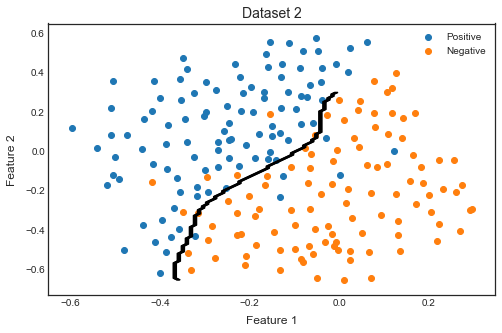

In [56]:
# Visualizando fronteira
model = grid_search.best_estimator_

visualizeBoundary(df3, X, model, True)